In [200]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


In [201]:
# Script definitions
# ------------------

# KMeans sequential - data.1.csv
# KMeans parallel - data.2.csv
# KMeans CUDA - data.3.csv

data_file = '../../lab4/data/data_cuda.csv'

images_dir = '../images/kmeans_cuda'


In [202]:
if not os.path.exists(images_dir):

	os.system("mkdir -p " + images_dir)

else :

	os.system("rm -r " + images_dir)
	os.system("mkdir -p " + images_dir)


In [203]:
data = pd.read_csv(data_file, sep=',', header=None)

# Column names matching the order in the printf statement
columns = [
    'image_path', 'block_size', 'clusters', 'image_size',
    'overhead', 'read', 'standardize', 'kmeans_malloc', 'kmeans_init',
    'kmeans_yi2_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update_1',
    'kmeans_update_2', 'kmeans_free', 'kmeans_transfer', 'kmeans_execution',
    'kmeans_total', 'kmeans_error', 'save', 'free', 'total', 'iterations',
    'maxBlocksPerSM_distance', 'maxBlocksPerSM_sum', 'maxBlocksPerSM_update',
    'maxBlocksPerSM_yi2', 'maxBlocksPerSM_error', 'occupancy_distance',
    'occupancy_sum', 'occupancy_update', 'occupancy_yi2', 'occupancy_error'
]

# Corresponding human-readable headers
headers = [
    'Image path', 'Block size', 'Clusters', 'Image size',
    'Overhead', 'Read', 'Standardize', 'KMeans malloc', 'KMeans init',
    'KMeans yi2 init', 'KMeans yi2', 'KMeans distance', 'KMeans update 1',
    'KMeans update 2', 'KMeans free', 'KMeans transfer', 'KMeans execution',
    'KMeans total', 'KMeans error', 'Save', 'Free', 'Total', 'Iterations',
    'Max blocks/SM distance kernel', 'Max blocks/SM sum kernel',
    'Max blocks/SM update kernel', 'Max blocks/SM yi2 kernel',
    'Max blocks/SM error kernel', 'Occupancy distance kernel',
    'Occupancy sum kernel', 'Occupancy update kernel', 'Occupancy yi2 kernel',
    'Occupancy error kernel'
]

# Apply column names to the DataFrame
data.columns = columns

print("Total rows: {0}".format(len(data)))


Total rows: 220


In [204]:
data = data[data['overhead'] < 0.1]

print("Total rows: {0}".format(len(data)))
data

Total rows: 220


,image_path,block_size,clusters,image_size,overhead,read,standardize,kmeans_malloc,kmeans_init,kmeans_yi2_init,...,maxBlocksPerSM_distance,maxBlocksPerSM_sum,maxBlocksPerSM_update,maxBlocksPerSM_yi2,maxBlocksPerSM_error,occupancy_distance,occupancy_sum,occupancy_update,occupancy_yi2,occupancy_error
0,./images/PaviaCityPV.raw,1,10,292454400,0.0,0.988660,0.291352,0.606220,0.632829,0.0,...,32,32,32,32,32,0.015625,0.015625,0.015625,0.015625,0.015625
1,./images/SantaBarbaraLine2014PV.raw,1,10,705560576,0.0,3.025123,0.702715,0.607426,0.674356,0.0,...,16,16,32,32,16,0.007812,0.007812,0.015625,0.015625,0.007812
2,./images/PaviaCityPV.raw,2,10,292454400,0.0,0.178354,0.291007,0.348936,0.373818,0.0,...,32,32,32,32,32,0.031250,0.031250,0.031250,0.031250,0.031250
3,./images/SantaBarbaraLine2014PV.raw,2,10,705560576,0.0,0.409777,0.703501,0.270185,0.334863,0.0,...,16,16,32,32,16,0.015625,0.015625,0.031250,0.031250,0.015625
4,./images/PaviaCityPV.raw,4,10,292454400,0.0,0.172614,0.291186,0.255565,0.282438,0.0,...,32,32,32,32,32,0.062500,0.062500,0.062500,0.062500,0.062500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,./images/SantaBarbaraLine2014PV.raw,256,10,705560576,0.0,0.412225,0.703553,0.348008,0.412200,0.0,...,8,8,8,8,8,1.000000,1.000000,1.000000,1.000000,1.000000
216,./images/PaviaCityPV.raw,512,10,292454400,0.0,0.181914,0.291065,0.814453,0.842348,0.0,...,4,4,4,4,4,1.000000,1.000000,1.000000,1.000000,1.000000
217,./images/SantaBarbaraLine2014PV.raw,512,10,705560576,0.0,0.411974,0.702995,0.375305,0.439131,0.0,...,4,4,4,4,4,1.000000,1.000000,1.000000,1.000000,1.000000
218,./images/PaviaCityPV.raw,1024,10,292454400,0.0,0.181662,0.290969,0.445898,0.473862,0.0,...,2,2,2,2,2,1.000000,1.000000,1.000000,1.000000,1.000000


In [205]:
data['image'] = data['image_path'].apply(lambda x: os.path.basename(x).split('.')[0].capitalize())

data['image'] = data['image'].replace({
    'Paviacitypv': 'Pavia',
    'Santabarbaraline2014pv': 'Barbara'
})
data 

,image_path,block_size,clusters,image_size,overhead,read,standardize,kmeans_malloc,kmeans_init,kmeans_yi2_init,...,maxBlocksPerSM_sum,maxBlocksPerSM_update,maxBlocksPerSM_yi2,maxBlocksPerSM_error,occupancy_distance,occupancy_sum,occupancy_update,occupancy_yi2,occupancy_error,image
0,./images/PaviaCityPV.raw,1,10,292454400,0.0,0.988660,0.291352,0.606220,0.632829,0.0,...,32,32,32,32,0.015625,0.015625,0.015625,0.015625,0.015625,Pavia
1,./images/SantaBarbaraLine2014PV.raw,1,10,705560576,0.0,3.025123,0.702715,0.607426,0.674356,0.0,...,16,32,32,16,0.007812,0.007812,0.015625,0.015625,0.007812,Barbara
2,./images/PaviaCityPV.raw,2,10,292454400,0.0,0.178354,0.291007,0.348936,0.373818,0.0,...,32,32,32,32,0.031250,0.031250,0.031250,0.031250,0.031250,Pavia
3,./images/SantaBarbaraLine2014PV.raw,2,10,705560576,0.0,0.409777,0.703501,0.270185,0.334863,0.0,...,16,32,32,16,0.015625,0.015625,0.031250,0.031250,0.015625,Barbara
4,./images/PaviaCityPV.raw,4,10,292454400,0.0,0.172614,0.291186,0.255565,0.282438,0.0,...,32,32,32,32,0.062500,0.062500,0.062500,0.062500,0.062500,Pavia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,./images/SantaBarbaraLine2014PV.raw,256,10,705560576,0.0,0.412225,0.703553,0.348008,0.412200,0.0,...,8,8,8,8,1.000000,1.000000,1.000000,1.000000,1.000000,Barbara
216,./images/PaviaCityPV.raw,512,10,292454400,0.0,0.181914,0.291065,0.814453,0.842348,0.0,...,4,4,4,4,1.000000,1.000000,1.000000,1.000000,1.000000,Pavia
217,./images/SantaBarbaraLine2014PV.raw,512,10,705560576,0.0,0.411974,0.702995,0.375305,0.439131,0.0,...,4,4,4,4,1.000000,1.000000,1.000000,1.000000,1.000000,Barbara
218,./images/PaviaCityPV.raw,1024,10,292454400,0.0,0.181662,0.290969,0.445898,0.473862,0.0,...,2,2,2,2,1.000000,1.000000,1.000000,1.000000,1.000000,Pavia


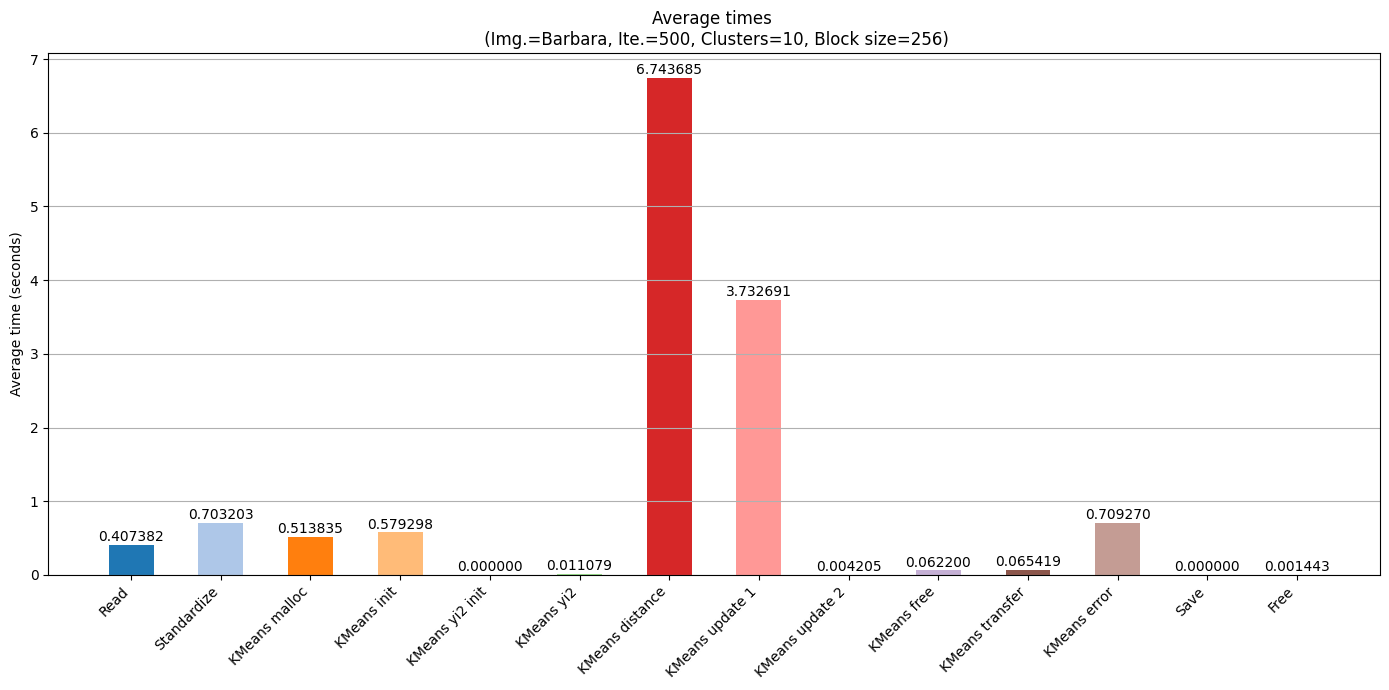

In [206]:
fixed_image = 'Barbara'
block_size = 256

filtered_data = data[data['image'] == fixed_image]
filtered_data = filtered_data[filtered_data['block_size'] == block_size]

time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update_1', 'kmeans_update_2', 'kmeans_free','kmeans_transfer','kmeans_error', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

avg_values = [filtered_data[comp].mean() for comp in time_components]


x = np.arange(len(time_components))
bar_width = 0.5

colors = plt.cm.tab20.colors[:len(time_components)]

fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.bar(x, avg_values, color=colors, width=bar_width)

for bar in bars:

	height = bar.get_height()

	ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.6f}', ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average times \n (Img.={fixed_image}, Ite.=500, Clusters=10, Block size={block_size})')
ax.grid(axis='y')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'avg_time_components.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'avg_time_components.{fixed_image.lower()}.pdf'))

plt.show()


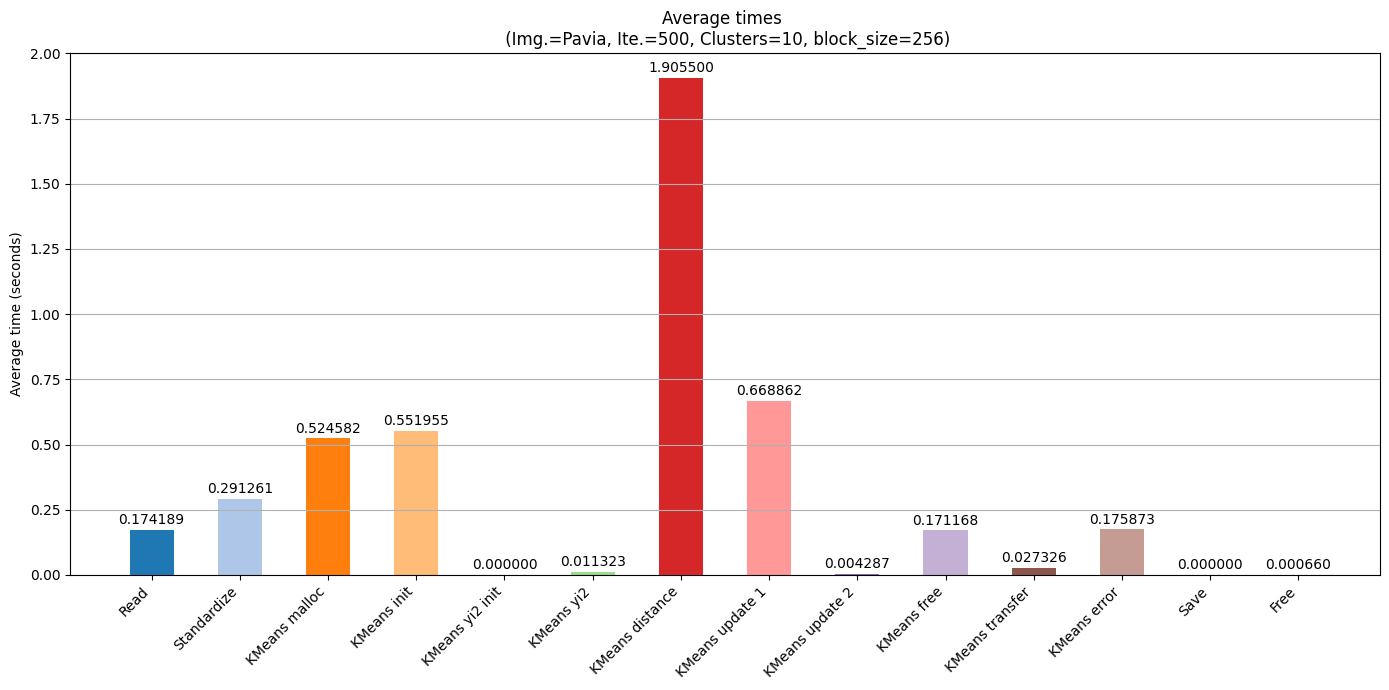

In [207]:
fixed_image = 'Pavia'
block_size = 256

filtered_data = data[data['image'] == fixed_image]
filtered_data = filtered_data[filtered_data['block_size'] == block_size]

time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update_1', 'kmeans_update_2', 'kmeans_free','kmeans_transfer','kmeans_error', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

avg_values = [filtered_data[comp].mean() for comp in time_components]

x = np.arange(len(time_components))
bar_width = 0.5

colors = plt.cm.tab20.colors[:len(time_components)]

fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.bar(x, avg_values, color=colors, width=bar_width)

for bar in bars:

	height = bar.get_height()

	ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.6f}', ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average times \n (Img.={fixed_image}, Ite.=500, Clusters=10, block_size={block_size})')
ax.grid(axis='y')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'avg_time_components.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'avg_time_components.{fixed_image.lower()}.pdf'))

plt.show()


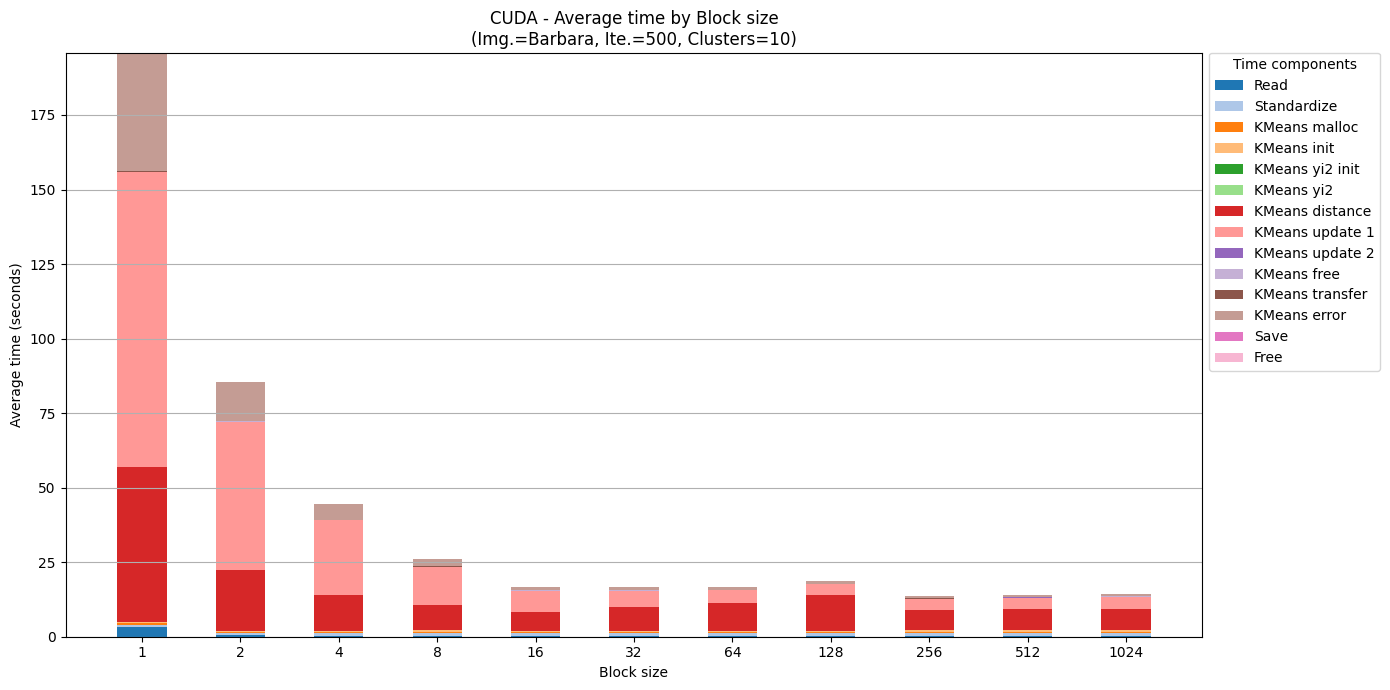

In [208]:
fixed_image = 'Barbara'

# Filtrar por imagen
filtered_data = data[data['image'] == fixed_image]

# Agrupar por chunk_size y calcular medias
grouped = filtered_data.groupby(['block_size']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['block_size'].unique())
time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update_1', 'kmeans_update_2', 'kmeans_free','kmeans_transfer','kmeans_error', 'save', 'free']

labels = [headers[columns.index(comp)] for comp in time_components]

bar_width = 0.5
x = np.arange(len(chunk_sizes))
colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

bottoms = np.zeros(len(chunk_sizes))

# Dibujar barras apiladas por componente de tiempo
for j, comp in enumerate(time_components):
    comp_values = []

    for chunk in chunk_sizes:
        row = grouped[grouped['block_size'] == chunk]
        val = row[comp].values[0] if not row.empty else 0
        comp_values.append(val)

    ax.bar(x, comp_values, bottom=bottoms, width=bar_width, label=labels[j], color=colors[j])
    bottoms += np.array(comp_values)

# Ejes y leyenda
ax.set_xticks(x)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Block size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'CUDA - Average time by Block size\n(Img.={fixed_image}, Ite.=500, Clusters=10)')
ax.legend(title='Time components', loc='upper left', bbox_to_anchor=(1, 1.0129))
ax.grid(axis='y')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'stacked_bar_cuda_chunk_avg.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'stacked_bar_cuda_chunk_avg.{fixed_image.lower()}.pdf'))

plt.show()

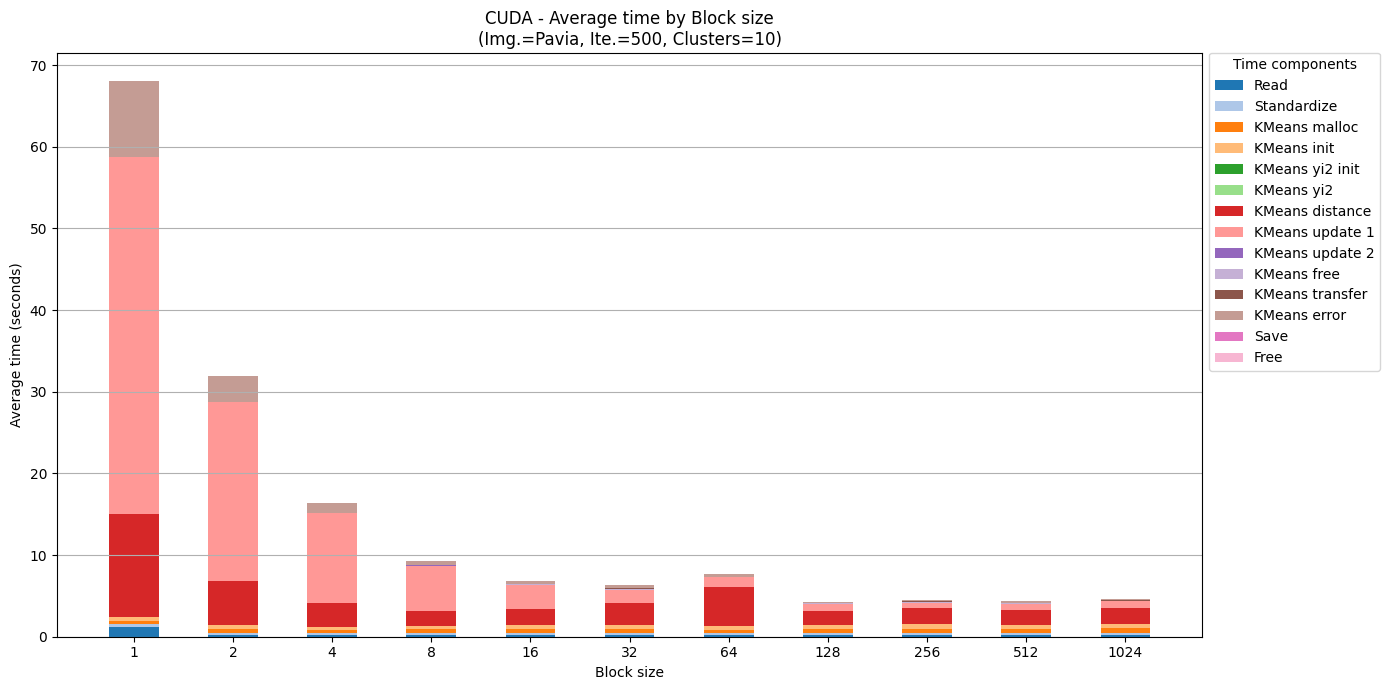

In [209]:
fixed_image = 'Pavia'

# Filtrar por imagen
filtered_data = data[data['image'] == fixed_image]

# Agrupar por chunk_size y calcular medias
grouped = filtered_data.groupby(['block_size']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['block_size'].unique())
time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update_1', 'kmeans_update_2', 'kmeans_free','kmeans_transfer','kmeans_error', 'save', 'free']

labels = [headers[columns.index(comp)] for comp in time_components]

bar_width = 0.5
x = np.arange(len(chunk_sizes))
colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

bottoms = np.zeros(len(chunk_sizes))

# Dibujar barras apiladas por componente de tiempo
for j, comp in enumerate(time_components):
    comp_values = []

    for chunk in chunk_sizes:
        row = grouped[grouped['block_size'] == chunk]
        val = row[comp].values[0] if not row.empty else 0
        comp_values.append(val)

    ax.bar(x, comp_values, bottom=bottoms, width=bar_width, label=labels[j], color=colors[j])
    bottoms += np.array(comp_values)

# Ejes y leyenda
ax.set_xticks(x)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Block size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'CUDA - Average time by Block size\n(Img.={fixed_image}, Ite.=500, Clusters=10)')
ax.legend(title='Time components', loc='upper left', bbox_to_anchor=(1, 1.0129))
ax.grid(axis='y')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'stacked_bar_cuda_chunk_avg.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'stacked_bar_cuda_chunk_avg.{fixed_image.lower()}.pdf'))

plt.show()


In [210]:
summary_data = []

for (image, block_size), group in data.groupby(['image_path', 'block_size']):

	# Sequential part
	mean_malloc_time = group['kmeans_malloc'].mean()
	mean_free_time = group['kmeans_free'].mean()
	mean_init_time = group['kmeans_init'].mean()
	mean_yi2_init_time = group['kmeans_yi2_init'].mean()
	mean_yi2_time = group['kmeans_yi2'].mean()
	mean_distance_time = group['kmeans_distance'].mean()
	mean_update_time_1 = group['kmeans_update_1'].mean()
	mean_update_time_2 = group['kmeans_update_2'].mean()

	mean_total_time = mean_malloc_time + mean_free_time + mean_init_time + mean_yi2_init_time + mean_yi2_time + mean_distance_time + mean_update_time_1 + mean_update_time_2

	summary_data.append([
		image,
		mean_malloc_time,
		mean_free_time,
		mean_init_time,
		mean_yi2_init_time,
		mean_yi2_time,
		mean_distance_time,
		mean_update_time_1,
		mean_update_time_2,
		mean_total_time,
	])

summary_df = pd.DataFrame(summary_data, columns=[
	'Image',
	'Mean malloc time',
	'Mean free time',
	'Mean init time',
	'Mean yi2 init time',
	'Mean yi2 time',
	'Mean distance time',
	'Mean update 1 time',
	'Mean update 2 time',
	'Mean total time',
])

summary_df = summary_df.round(6)

display(summary_df)

latex_table = summary_df.to_latex(index=False, float_format="%.6f")
print(latex_table)


,Image,Mean malloc time,Mean free time,Mean init time,Mean yi2 init time,Mean yi2 time,Mean distance time,Mean update 1 time,Mean update 2 time,Mean total time
0,./images/PaviaCityPV.raw,0.420826,0.050197,0.448167,0.0,0.006392,12.616075,43.708999,0.004564,57.255221
1,./images/PaviaCityPV.raw,0.449923,0.060552,0.476603,0.0,0.007439,5.368608,21.938248,0.004401,28.305774
2,./images/PaviaCityPV.raw,0.352434,0.039477,0.379867,0.0,0.009333,2.914700,11.014080,0.004297,14.714188
3,./images/PaviaCityPV.raw,0.426638,0.024141,0.454229,0.0,0.010453,1.765934,5.595826,0.004222,8.281443
4,./images/PaviaCityPV.raw,0.450814,0.119073,0.478382,0.0,0.010350,2.011311,2.884284,0.004172,5.958387
5,./images/PaviaCityPV.raw,0.456652,0.150759,0.484188,0.0,0.009930,2.695731,1.625945,0.004131,5.427336
6,./images/PaviaCityPV.raw,0.413948,0.068766,0.441491,0.0,0.009873,4.817528,1.123681,0.004114,6.879401
7,./images/PaviaCityPV.raw,0.468900,0.129860,0.496423,0.0,0.010614,1.744474,0.770395,0.004279,3.624945
8,./images/PaviaCityPV.raw,0.524582,0.171168,0.551955,0.0,0.011323,1.905500,0.668862,0.004287,3.837677
9,./images/PaviaCityPV.raw,0.451320,0.171486,0.479009,0.0,0.010706,1.877901,0.668520,0.004258,3.663199


\begin{tabular}{lrrrrrrrrr}
\toprule
                              Image &  Mean malloc time &  Mean free time &  Mean init time &  Mean yi2 init time &  Mean yi2 time &  Mean distance time &  Mean update 1 time &  Mean update 2 time &  Mean total time \\
\midrule
           ./images/PaviaCityPV.raw &          0.420826 &        0.050197 &        0.448167 &            0.000000 &       0.006392 &           12.616075 &           43.708999 &            0.004564 &        57.255221 \\
           ./images/PaviaCityPV.raw &          0.449923 &        0.060552 &        0.476603 &            0.000000 &       0.007439 &            5.368608 &           21.938248 &            0.004401 &        28.305774 \\
           ./images/PaviaCityPV.raw &          0.352434 &        0.039477 &        0.379867 &            0.000000 &       0.009333 &            2.914700 &           11.014080 &            0.004297 &        14.714188 \\
           ./images/PaviaCityPV.raw &          0.426638 &        0.024141 &   

/tmp/ipykernel_477286/1197162858.py:47: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = summary_df.to_latex(index=False, float_format="%.6f")


In [211]:
# Elegimos configuración de referencia: menor block_size
min_block_size = data['block_size'].min()
ref_dataset = data[data['block_size'] == min_block_size]

# Tiempos de referencia agrupados por imagen y block_size (aunque el block_size está fijo)
ref_times_init = ref_dataset.groupby(['image'])['kmeans_init'].mean()
ref_times_yi2_init = ref_dataset.groupby(['image'])['kmeans_yi2_init'].mean()
ref_times_yi2 = ref_dataset.groupby(['image'])['kmeans_yi2'].mean()
ref_times_distance = ref_dataset.groupby(['image'])['kmeans_distance'].mean()
ref_times_update_1 = ref_dataset.groupby(['image'])['kmeans_update_1'].mean()
ref_times_update_2 = ref_dataset.groupby(['image'])['kmeans_update_2'].mean()

summary_data = []

# Agrupar por imagen y tamaño de bloque
for (image, block_size), group in data.groupby(['image', 'block_size']):
    
    # Tiempos promedio por componente
    mean_malloc_time = group['kmeans_malloc'].mean()
    mean_transfer_time = group['kmeans_transfer'].mean()
    mean_free_time = group['kmeans_free'].mean()
    mean_init_time = group['kmeans_init'].mean()
    mean_yi2_init_time = group['kmeans_yi2_init'].mean()
    mean_yi2_time = group['kmeans_yi2'].mean()
    mean_distance_time = group['kmeans_distance'].mean()
    mean_update_1_time = group['kmeans_update_1'].mean()
    mean_update_2_time = group['kmeans_update_2'].mean()
    mean_error_time = group['kmeans_error'].mean()
    mean_total_time = group['kmeans_total'].mean()

    # Tiempos de referencia
    ref_init = ref_times_init.get(image, None)
    ref_yi2_init = ref_times_yi2_init.get(image, None)
    ref_yi2 = ref_times_yi2.get(image, None)
    ref_distance = ref_times_distance.get(image, None)
    ref_update_1 = ref_times_update_1.get(image, None)
    ref_update_2 = ref_times_update_2.get(image, None)

    # Speedups
    speedup_init = ref_init / mean_init_time if mean_init_time else None
    speedup_yi2_init = ref_yi2_init / mean_yi2_init_time if mean_yi2_init_time else None
    speedup_yi2 = ref_yi2 / mean_yi2_time if mean_yi2_time else None
    speedup_distance = ref_distance / mean_distance_time if mean_distance_time else None
    speedup_update_1 = ref_update_1 / mean_update_1_time if mean_update_1_time else None
    speedup_update_2 = ref_update_2 / mean_update_2_time if mean_update_2_time else None

    summary_data.append([
        image,
        block_size,
        mean_malloc_time,
        mean_transfer_time,
        mean_free_time,
        mean_init_time,
        mean_yi2_init_time,
        mean_yi2_time,
        mean_distance_time,
        mean_update_1_time,
        mean_update_2_time,
        mean_error_time,
        mean_total_time,
        ref_init,
        ref_yi2_init,
        ref_yi2,
        ref_distance,
        ref_update_1,
        ref_update_2,
        speedup_init,
        speedup_yi2_init,
        speedup_yi2,
        speedup_distance,
        speedup_update_1,
        speedup_update_2,
    ])

# Crear DataFrame
summary_df = pd.DataFrame(summary_data, columns=[
    'Image',
    'Block size',
    'Mean malloc time',
    'Mean transfer time',
    'Mean free time',
    'Mean init time',
    'Mean yi2 init time',
    'Mean yi2 time',
    'Mean distance time',
    'Mean update time 1',
    'Mean update time 2',
    'Mean error time',
    'Mean total time',
    'Ref init time',
    'Ref yi2 init time',
    'Ref yi2 time',
    'Ref distance time',
    'Ref update time 1',
    'Ref update time 2',
    'Speedup init',
    'Speedup yi2 init',
    'Speedup yi2',
    'Speedup distance',
    'Speedup update 1',
    'Speedup update 2',
])

# Redondear
summary_df = summary_df.round(6)

# Mostrar
display(summary_df)

# Exportar a LaTeX
latex_table = summary_df.to_latex(index=False, float_format="%.6f")
print(latex_table)



,Image,Block size,Mean malloc time,Mean transfer time,Mean free time,Mean init time,Mean yi2 init time,Mean yi2 time,Mean distance time,Mean update time 1,...,Ref yi2 time,Ref distance time,Ref update time 1,Ref update time 2,Speedup init,Speedup yi2 init,Speedup yi2,Speedup distance,Speedup update 1,Speedup update 2
0,Barbara,1,0.523179,0.065706,0.096427,0.588932,0.0,0.011106,51.823234,99.069484,...,0.011106,51.823234,99.069484,0.004942,1.000000,None,1.000000,1.000000,1.000000,1.000000
1,Barbara,2,0.440383,0.065468,0.090128,0.505895,0.0,0.011252,20.398291,49.676311,...,0.011106,51.823234,99.069484,0.004942,1.164139,None,0.987015,2.540567,1.994300,1.091608
2,Barbara,4,0.398844,0.065650,0.111162,0.464539,0.0,0.011640,12.176173,24.908303,...,0.011106,51.823234,99.069484,0.004942,1.267778,None,0.954123,4.256118,3.977368,1.141458
3,Barbara,8,0.491097,0.066092,0.120436,0.557233,0.0,0.011057,8.541369,12.658871,...,0.011106,51.823234,99.069484,0.004942,1.056887,None,1.004368,6.067322,7.826092,1.147981
4,Barbara,16,0.356973,0.065287,0.134092,0.422308,0.0,0.010847,6.418583,7.105699,...,0.011106,51.823234,99.069484,0.004942,1.394554,None,1.023869,8.073937,13.942258,1.155714
5,Barbara,32,0.424268,0.065654,0.068519,0.489966,0.0,0.010564,7.913577,5.527740,...,0.011106,51.823234,99.069484,0.004942,1.201985,None,1.051308,6.548649,17.922240,1.170496
6,Barbara,64,0.450148,0.065238,0.074534,0.515432,0.0,0.010510,9.281808,4.278706,...,0.011106,51.823234,99.069484,0.004942,1.142599,None,1.056710,5.583312,23.154073,1.179830
7,Barbara,128,0.438694,0.065383,0.073708,0.504121,0.0,0.010862,11.875984,3.723920,...,0.011106,51.823234,99.069484,0.004942,1.168235,None,1.022398,4.363700,26.603546,1.178170
8,Barbara,256,0.513835,0.065419,0.062200,0.579298,0.0,0.011079,6.743685,3.732691,...,0.011106,51.823234,99.069484,0.004942,1.016631,None,1.002374,7.684706,26.541037,1.175144
9,Barbara,512,0.540245,0.065914,0.085145,0.606205,0.0,0.010422,7.009726,3.877102,...,0.011106,51.823234,99.069484,0.004942,0.971506,None,1.065632,7.393047,25.552457,1.184326


\begin{tabular}{lrrrrrrrrrrrrrrrrrrrlrrrr}
\toprule
  Image &  Block size &  Mean malloc time &  Mean transfer time &  Mean free time &  Mean init time &  Mean yi2 init time &  Mean yi2 time &  Mean distance time &  Mean update time 1 &  Mean update time 2 &  Mean error time &  Mean total time &  Ref init time &  Ref yi2 init time &  Ref yi2 time &  Ref distance time &  Ref update time 1 &  Ref update time 2 &  Speedup init & Speedup yi2 init &  Speedup yi2 &  Speedup distance &  Speedup update 1 &  Speedup update 2 \\
\midrule
Barbara &           1 &          0.523179 &            0.065706 &        0.096427 &        0.588932 &            0.000000 &       0.011106 &           51.823234 &           99.069484 &            0.004942 &        39.641421 &       191.236772 &       0.588932 &           0.000000 &      0.011106 &          51.823234 &          99.069484 &           0.004942 &      1.000000 &             None &     1.000000 &          1.000000 &          1.000000 &          1.000

/tmp/ipykernel_477286/876029618.py:111: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = summary_df.to_latex(index=False, float_format="%.6f")


In [212]:
# === Referencias ===

# Referencia: mínimo block_size (CUDA)
ref_block_size = data['block_size'].min()
ref_dataset = data[data['block_size'] == ref_block_size]

ref_times_init = ref_dataset.groupby(['image'])['kmeans_init'].mean()
ref_times_yi2_init = ref_dataset.groupby(['image'])['kmeans_yi2_init'].mean()
ref_times_yi2 = ref_dataset.groupby(['image'])['kmeans_yi2'].mean()
ref_times_distance = ref_dataset.groupby(['image'])['kmeans_distance'].mean()
ref_times_update_1 = ref_dataset.groupby(['image'])['kmeans_update_1'].mean()
ref_times_update_2 = ref_dataset.groupby(['image'])['kmeans_update_2'].mean()
ref_times_total = ref_dataset.groupby(['image'])['kmeans_total'].mean()

# Referencia: secuencial (datos dados)
seq_ref = {
    'Barbara': {
        'malloc': 0.000018, 'free': 0.000002, 'init': 0.000009,
        'yi2_init': 0.000003, 'yi2': 0.001517,
        'distance': 1188.867729, 'update_1': 56.727657, 'update_2': 0.001292,
        'total': 1245.598227
    },
    'Pavia': {
        'malloc': 0.000014, 'free': 0.000002, 'init': 0.000004,
        'yi2_init': 0.000001, 'yi2': 0.000565,
        'distance': 426.597588, 'update_1': 21.848410, 'update_2': 0.000616,
        'total': 448.447199
    }
}

# === Resumen ===
summary_data = []

for (image, block_size), group in data.groupby(['image', 'block_size']):
    # Medias
    mean_malloc_time = group['kmeans_malloc'].mean()
    mean_transfer_time = group['kmeans_transfer'].mean()
    mean_free_time = group['kmeans_free'].mean()
    mean_init_time = group['kmeans_init'].mean()
    mean_yi2_init_time = group['kmeans_yi2_init'].mean()
    mean_yi2_time = group['kmeans_yi2'].mean()
    mean_distance_time = group['kmeans_distance'].mean()
    mean_update_1_time = group['kmeans_update_1'].mean()
    mean_update_2_time = group['kmeans_update_2'].mean()
    mean_error_time = group['kmeans_error'].mean()
    mean_total_time = group['kmeans_total'].mean()

    # Referencias CUDA (mínimo block size)
    ref_init = ref_times_init.get(image, None)
    ref_yi2_init = ref_times_yi2_init.get(image, None)
    ref_yi2 = ref_times_yi2.get(image, None)
    ref_distance = ref_times_distance.get(image, None)
    ref_update_1 = ref_times_update_1.get(image, None)
    ref_update_2 = ref_times_update_2.get(image, None)
    ref_total = ref_times_total.get(image, None)

    # Referencias secuencial
    seq = seq_ref[image]
    seq_init = seq['init']
    seq_yi2_init = seq['yi2_init']
    seq_yi2 = seq['yi2']
    seq_distance = seq['distance']
    seq_update_1 = seq['update_1']
    seq_update_2 = seq['update_2']
    seq_total = seq['total']

    # Speedup y eficiencia (CUDA)
    speedup_init_cuda = ref_init / mean_init_time if mean_init_time else None
    speedup_yi2_init_cuda = ref_yi2_init / mean_yi2_init_time if mean_yi2_init_time else None
    speedup_yi2_cuda = ref_yi2 / mean_yi2_time if mean_yi2_time else None
    speedup_distance_cuda = ref_distance / mean_distance_time if mean_distance_time else None
    speedup_update_1_cuda = ref_update_1 / mean_update_1_time if mean_update_1_time else None
    speedup_update_2_cuda = ref_update_2 / mean_update_2_time if mean_update_2_time else None
    speedup_total_cuda = ref_total / mean_total_time if mean_total_time else None

    efficiency_init_cuda = speedup_init_cuda / block_size if speedup_init_cuda else None
    efficiency_yi2_init_cuda = speedup_yi2_init_cuda / block_size if speedup_yi2_init_cuda else None
    efficiency_yi2_cuda = speedup_yi2_cuda / block_size if speedup_yi2_cuda else None
    efficiency_distance_cuda = speedup_distance_cuda / block_size if speedup_distance_cuda else None
    efficiency_update_1_cuda = speedup_update_1_cuda / block_size if speedup_update_1_cuda else None
    efficiency_update_2_cuda = speedup_update_2_cuda / block_size if speedup_update_2_cuda else None
    efficiency_total_cuda = speedup_total_cuda / block_size if speedup_total_cuda else None

    # Speedup y eficiencia (secuencial)
    speedup_init_seq = seq_init / mean_init_time if mean_init_time else None
    speedup_yi2_init_seq = seq_yi2_init / mean_yi2_init_time if mean_yi2_init_time else None
    speedup_yi2_seq = seq_yi2 / mean_yi2_time if mean_yi2_time else None
    speedup_distance_seq = seq_distance / mean_distance_time if mean_distance_time else None
    speedup_update_1_seq = seq_update_1 / mean_update_1_time if mean_update_1_time else None
    speedup_update_2_seq = seq_update_2 / mean_update_2_time if mean_update_2_time else None
    speedup_total_seq = seq_total / mean_total_time if mean_total_time else None

    efficiency_init_seq = speedup_init_seq / block_size if speedup_init_seq else None
    efficiency_yi2_init_seq = speedup_yi2_init_seq / block_size if speedup_yi2_init_seq else None
    efficiency_yi2_seq = speedup_yi2_seq / block_size if speedup_yi2_seq else None
    efficiency_distance_seq = speedup_distance_seq / block_size if speedup_distance_seq else None
    efficiency_update_1_seq = speedup_update_1_seq / block_size if speedup_update_1_seq else None
    efficiency_update_2_seq = speedup_update_2_seq / block_size if speedup_update_2_seq else None
    efficiency_total_seq = speedup_total_seq / block_size if speedup_total_seq else None

    summary_data.append([
        image,
        block_size,
        mean_malloc_time,
        mean_transfer_time,
        mean_free_time,
        mean_init_time,
        mean_yi2_init_time,
        mean_yi2_time,
        mean_distance_time,
        mean_update_1_time,
        mean_update_2_time,
        mean_error_time,
        mean_total_time,
        # Speedup / Eficiencia CUDA
        speedup_init_cuda, efficiency_init_cuda,
        speedup_yi2_init_cuda, efficiency_yi2_init_cuda,
        speedup_yi2_cuda, efficiency_yi2_cuda,
        speedup_distance_cuda, efficiency_distance_cuda,
        speedup_update_1_cuda, efficiency_update_1_cuda,
        speedup_update_2_cuda, efficiency_update_2_cuda,
        speedup_total_cuda, efficiency_total_cuda,
        # Speedup / Eficiencia Secuencial
        speedup_init_seq, efficiency_init_seq,
        speedup_yi2_init_seq, efficiency_yi2_init_seq,
        speedup_yi2_seq, efficiency_yi2_seq,
        speedup_distance_seq, efficiency_distance_seq,
        speedup_update_1_seq, efficiency_update_1_seq,
        speedup_update_2_seq, efficiency_update_2_seq,
        speedup_total_seq, efficiency_total_seq,
    ])

# === Crear DataFrame ===

summary_df = pd.DataFrame(summary_data, columns=[
    'Image',
    'Block size',
    'Mean malloc time',
    'Mean transfer time',
    'Mean free time',
    'Mean init time',
    'Mean yi2 init time',
    'Mean yi2 time',
    'Mean distance time',
    'Mean update time 1',
    'Mean update time 2',
    'Mean error time',
    'Mean total time',
    # Speedup / Efficiency (CUDA)
    'Speedup init (min block)', 'Efficiency init (min block)',
    'Speedup yi2 init (min block)', 'Efficiency yi2 init (min block)',
    'Speedup yi2 (min block)', 'Efficiency yi2 (min block)',
    'Speedup distance (min block)', 'Efficiency distance (min block)',
    'Speedup update 1 (min block)', 'Efficiency update 1 (min block)',
    'Speedup update 2 (min block)', 'Efficiency update 2 (min block)',
    'Speedup total (min block)', 'Efficiency total (min block)',
    # Speedup / Efficiency (Sequential)
    'Speedup init (seq)', 'Efficiency init (seq)',
    'Speedup yi2 init (seq)', 'Efficiency yi2 init (seq)',
    'Speedup yi2 (seq)', 'Efficiency yi2 (seq)',
    'Speedup distance (seq)', 'Efficiency distance (seq)',
    'Speedup update 1 (seq)', 'Efficiency update 1 (seq)',
    'Speedup update 2 (seq)', 'Efficiency update 2 (seq)',
    'Speedup total (seq)', 'Efficiency total (seq)',
])

# Redondear
summary_df = summary_df.round(6)

# Mostrar
display(summary_df)

# Exportar a LaTeX
latex_table = summary_df.to_latex(index=False, float_format="%.6f")
print(latex_table)


,Image,Block size,Mean malloc time,Mean transfer time,Mean free time,Mean init time,Mean yi2 init time,Mean yi2 time,Mean distance time,Mean update time 1,...,Speedup yi2 (seq),Efficiency yi2 (seq),Speedup distance (seq),Efficiency distance (seq),Speedup update 1 (seq),Efficiency update 1 (seq),Speedup update 2 (seq),Efficiency update 2 (seq),Speedup total (seq),Efficiency total (seq)
0,Barbara,1,0.523179,0.065706,0.096427,0.588932,0.0,0.011106,51.823234,99.069484,...,0.136597,0.136597,22.940825,22.940825,0.572605,0.572605,0.261454,0.261454,6.513382,6.513382
1,Barbara,2,0.440383,0.065468,0.090128,0.505895,0.0,0.011252,20.398291,49.676311,...,0.134823,0.067411,58.282713,29.141356,1.141946,0.570973,0.285405,0.142703,14.838049,7.419024
2,Barbara,4,0.398844,0.065650,0.111162,0.464539,0.0,0.011640,12.176173,24.908303,...,0.130330,0.032582,97.638863,24.409716,2.277460,0.569365,0.298439,0.074610,28.993569,7.248392
3,Barbara,8,0.491097,0.066092,0.120436,0.557233,0.0,0.011057,8.541369,12.658871,...,0.137193,0.017149,139.189362,17.398670,4.481257,0.560157,0.300144,0.037518,51.070592,6.383824
4,Barbara,16,0.356973,0.065287,0.134092,0.422308,0.0,0.010847,6.418583,7.105699,...,0.139857,0.008741,185.222762,11.576423,7.983403,0.498963,0.302166,0.018885,81.856040,5.116002
5,Barbara,32,0.424268,0.065654,0.068519,0.489966,0.0,0.010564,7.913577,5.527740,...,0.143605,0.004488,150.231397,4.694731,10.262359,0.320699,0.306031,0.009563,83.457143,2.608036
6,Barbara,64,0.450148,0.065238,0.074534,0.515432,0.0,0.010510,9.281808,4.278706,...,0.144343,0.002255,128.085791,2.001340,13.258132,0.207158,0.308471,0.004820,83.258688,1.300917
7,Barbara,128,0.438694,0.065383,0.073708,0.504121,0.0,0.010862,11.875984,3.723920,...,0.139656,0.001091,100.106879,0.782085,15.233317,0.119010,0.308037,0.002407,72.854599,0.569177
8,Barbara,256,0.513835,0.065419,0.062200,0.579298,0.0,0.011079,6.743685,3.732691,...,0.136921,0.000535,176.293490,0.688646,15.197524,0.059365,0.307246,0.001200,105.170643,0.410823
9,Barbara,512,0.540245,0.065914,0.085145,0.606205,0.0,0.010422,7.009726,3.877102,...,0.145562,0.000284,169.602604,0.331255,14.631458,0.028577,0.309646,0.000605,101.108290,0.197477


\begin{tabular}{lrrrrrrrrrrrrrrllrrrrrrrrrrrrllrrrrrrrrrr}
\toprule
  Image &  Block size &  Mean malloc time &  Mean transfer time &  Mean free time &  Mean init time &  Mean yi2 init time &  Mean yi2 time &  Mean distance time &  Mean update time 1 &  Mean update time 2 &  Mean error time &  Mean total time &  Speedup init (min block) &  Efficiency init (min block) & Speedup yi2 init (min block) & Efficiency yi2 init (min block) &  Speedup yi2 (min block) &  Efficiency yi2 (min block) &  Speedup distance (min block) &  Efficiency distance (min block) &  Speedup update 1 (min block) &  Efficiency update 1 (min block) &  Speedup update 2 (min block) &  Efficiency update 2 (min block) &  Speedup total (min block) &  Efficiency total (min block) &  Speedup init (seq) &  Efficiency init (seq) & Speedup yi2 init (seq) & Efficiency yi2 init (seq) &  Speedup yi2 (seq) &  Efficiency yi2 (seq) &  Speedup distance (seq) &  Efficiency distance (seq) &  Speedup update 1 (seq) &  Efficiency update

/tmp/ipykernel_477286/688221555.py:174: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = summary_df.to_latex(index=False, float_format="%.6f")


In [213]:
summary_data_2 = []

# Agrupar por imagen y tamaño de bloque
for (image, block_size), group in data.groupby(['image', 'block_size']):
    
    # Parte secuencial
    
    mean_read = group['read'].mean()
    mean_standardize = group['standardize'].mean()
    mean_max_blocks_distance = group['maxBlocksPerSM_distance'].mean()
    mean_max_blocks_sum = group['maxBlocksPerSM_sum'].mean()
    mean_max_blocks_update = group['maxBlocksPerSM_update'].mean()
    mean_max_blocks_yi2 = group['maxBlocksPerSM_yi2'].mean()
    mean_max_blocks_error = group['maxBlocksPerSM_error'].mean()
    mean_occupancy_distance = group['occupancy_distance'].mean()
    mean_occupancy_sum = group['occupancy_sum'].mean()
    mean_occupancy_update = group['occupancy_update'].mean()
    mean_occupancy_yi2 = group['occupancy_yi2'].mean()
    mean_occupancy_error = group['occupancy_error'].mean()
    
    

    summary_data_2.append([
        image,
        block_size,
        mean_read,
        mean_standardize,
        mean_max_blocks_distance,
        mean_max_blocks_sum,
        mean_max_blocks_update,
        mean_max_blocks_yi2,
        mean_max_blocks_error,
        mean_occupancy_distance,
        mean_occupancy_sum,
        mean_occupancy_update,
        mean_occupancy_yi2,
        mean_occupancy_error,
    ])

# Crear DataFrame con los resultados
summary_df_2 = pd.DataFrame(summary_data_2, columns=[
    'Image',
    'Block size',
    'Mean read time',
    'Mean standardize time',
    'Mean max blocks distance kernel',
    'Mean max blocks sum kernel',
    'Mean max blocks update kernel',
    'Mean max blocks yi2 kernel',
    'Mean max blocks error kernel',
    'Mean occupancy distance kernel',
    'Mean occupancy sum kernel',
    'Mean occupancy update kernel',
    'Mean occupancy yi2 kernel',
    'Mean occupancy error kernel',
])

# Redondear y mostrar resultados
summary_df_2 = summary_df_2.round(6)

display(summary_df_2)

# Exportar a LaTeX
latex_table = summary_df_2.to_latex(index=False, float_format="%.6f")
print(latex_table)

,Image,Block size,Mean read time,Mean standardize time,Mean max blocks distance kernel,Mean max blocks sum kernel,Mean max blocks update kernel,Mean max blocks yi2 kernel,Mean max blocks error kernel,Mean occupancy distance kernel,Mean occupancy sum kernel,Mean occupancy update kernel,Mean occupancy yi2 kernel,Mean occupancy error kernel
0,Barbara,1,3.221795,0.703005,16.0,16.0,32.0,32.0,16.0,0.007812,0.007812,0.015625,0.015625,0.007812
1,Barbara,2,0.417520,0.702854,16.0,16.0,32.0,32.0,16.0,0.015625,0.015625,0.031250,0.031250,0.015625
2,Barbara,4,0.408008,0.703081,16.0,16.0,32.0,32.0,16.0,0.031250,0.031250,0.062500,0.062500,0.031250
3,Barbara,8,0.407194,0.702916,16.0,16.0,32.0,32.0,16.0,0.062500,0.062500,0.125000,0.125000,0.062500
4,Barbara,16,0.407406,0.702948,16.0,16.0,32.0,32.0,16.0,0.125000,0.125000,0.250000,0.250000,0.125000
5,Barbara,32,0.406894,0.702934,16.0,16.0,32.0,32.0,16.0,0.250000,0.250000,0.500000,0.500000,0.250000
6,Barbara,64,0.407686,0.702883,16.0,16.0,32.0,32.0,16.0,0.500000,0.500000,1.000000,1.000000,0.500000
7,Barbara,128,0.408344,0.703087,16.0,16.0,16.0,16.0,16.0,1.000000,1.000000,1.000000,1.000000,1.000000
8,Barbara,256,0.407382,0.703203,8.0,8.0,8.0,8.0,8.0,1.000000,1.000000,1.000000,1.000000,1.000000
9,Barbara,512,0.406006,0.702858,4.0,4.0,4.0,4.0,4.0,1.000000,1.000000,1.000000,1.000000,1.000000


\begin{tabular}{lrrrrrrrrrrrrr}
\toprule
  Image &  Block size &  Mean read time &  Mean standardize time &  Mean max blocks distance kernel &  Mean max blocks sum kernel &  Mean max blocks update kernel &  Mean max blocks yi2 kernel &  Mean max blocks error kernel &  Mean occupancy distance kernel &  Mean occupancy sum kernel &  Mean occupancy update kernel &  Mean occupancy yi2 kernel &  Mean occupancy error kernel \\
\midrule
Barbara &           1 &        3.221795 &               0.703005 &                        16.000000 &                   16.000000 &                      32.000000 &                   32.000000 &                     16.000000 &                        0.007812 &                   0.007812 &                      0.015625 &                   0.015625 &                     0.007812 \\
Barbara &           2 &        0.417520 &               0.702854 &                        16.000000 &                   16.000000 &                      32.000000 &                   3

/tmp/ipykernel_477286/3497376254.py:64: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = summary_df_2.to_latex(index=False, float_format="%.6f")


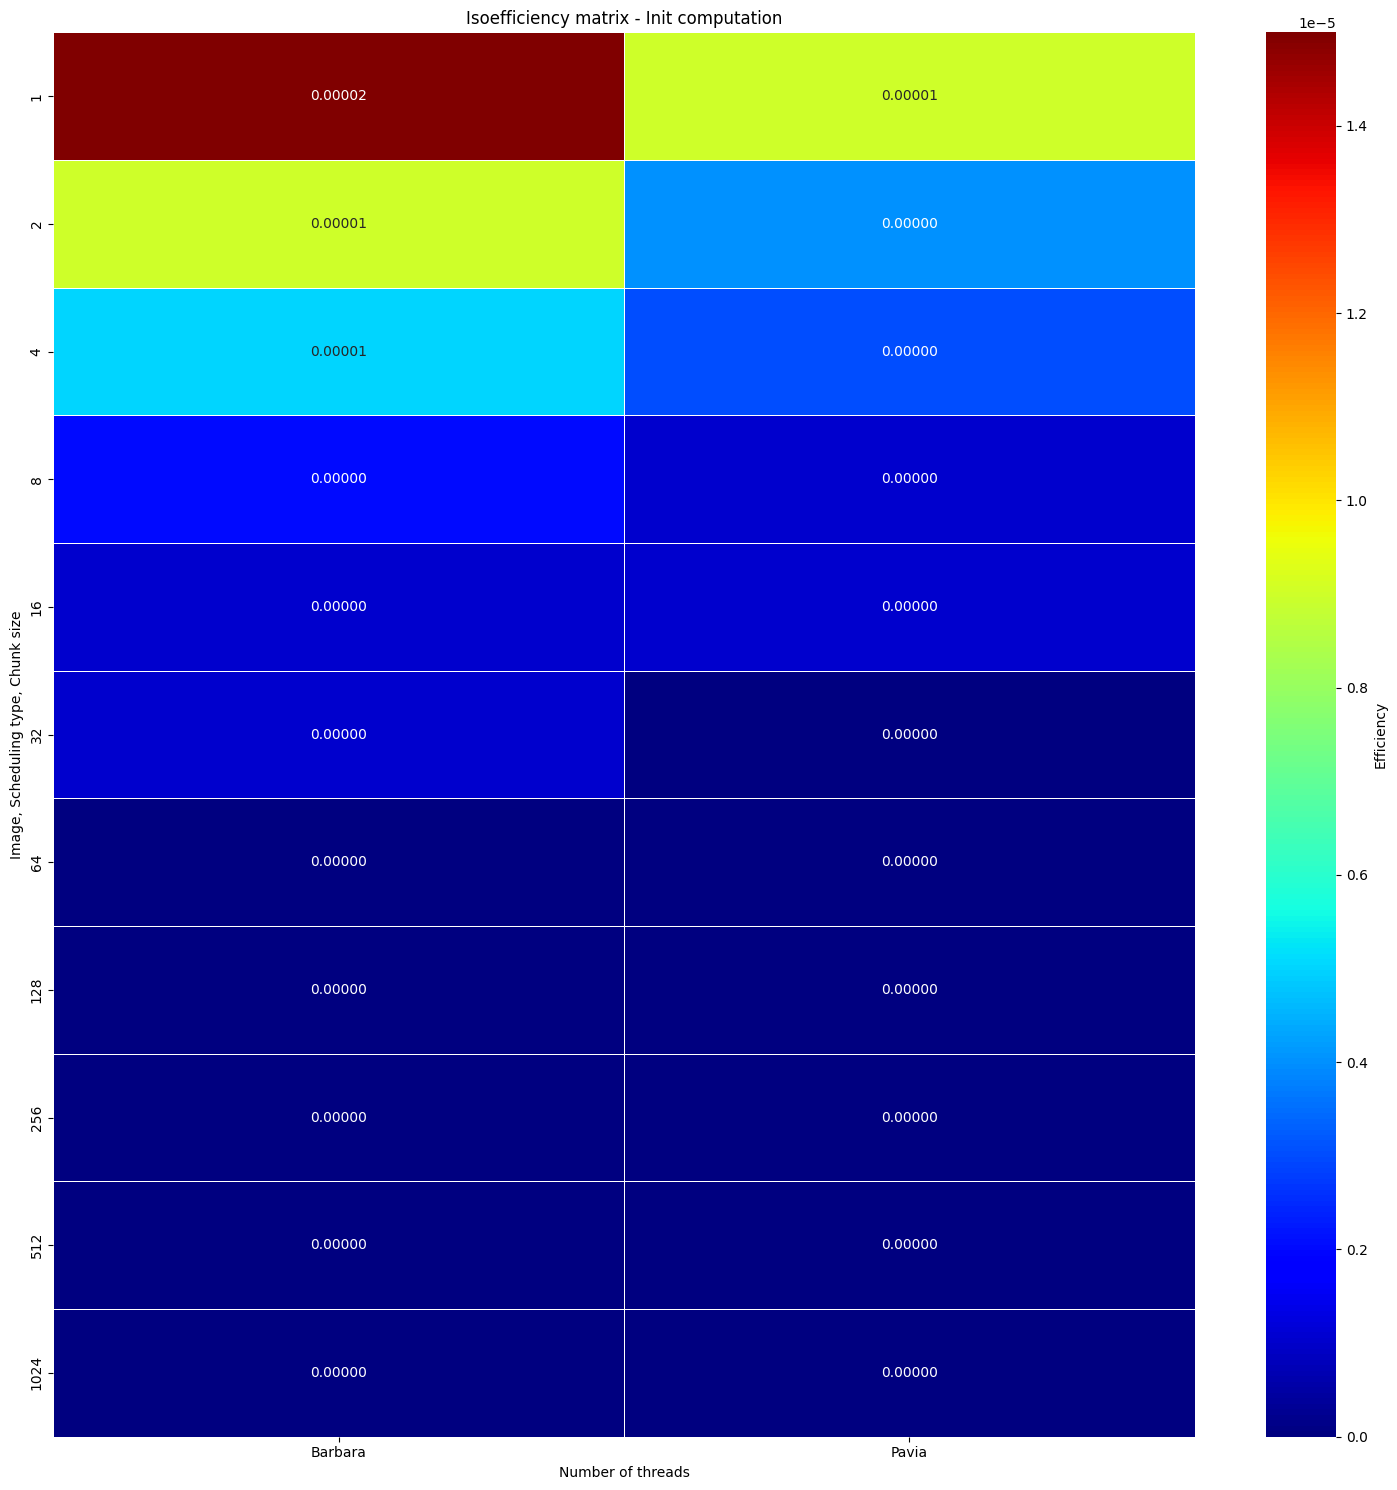

In [233]:
auto_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency init (seq)',
	index=['Block size'],
	columns='Image'
)


plt.figure(figsize=(15, 15))

sns.heatmap(auto_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Init computation')
plt.ylabel('Image, Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_init_cuda.png'))
plt.savefig(os.path.join(images_dir, 'isoefficiency_init_cuda.pdf'))

plt.show()

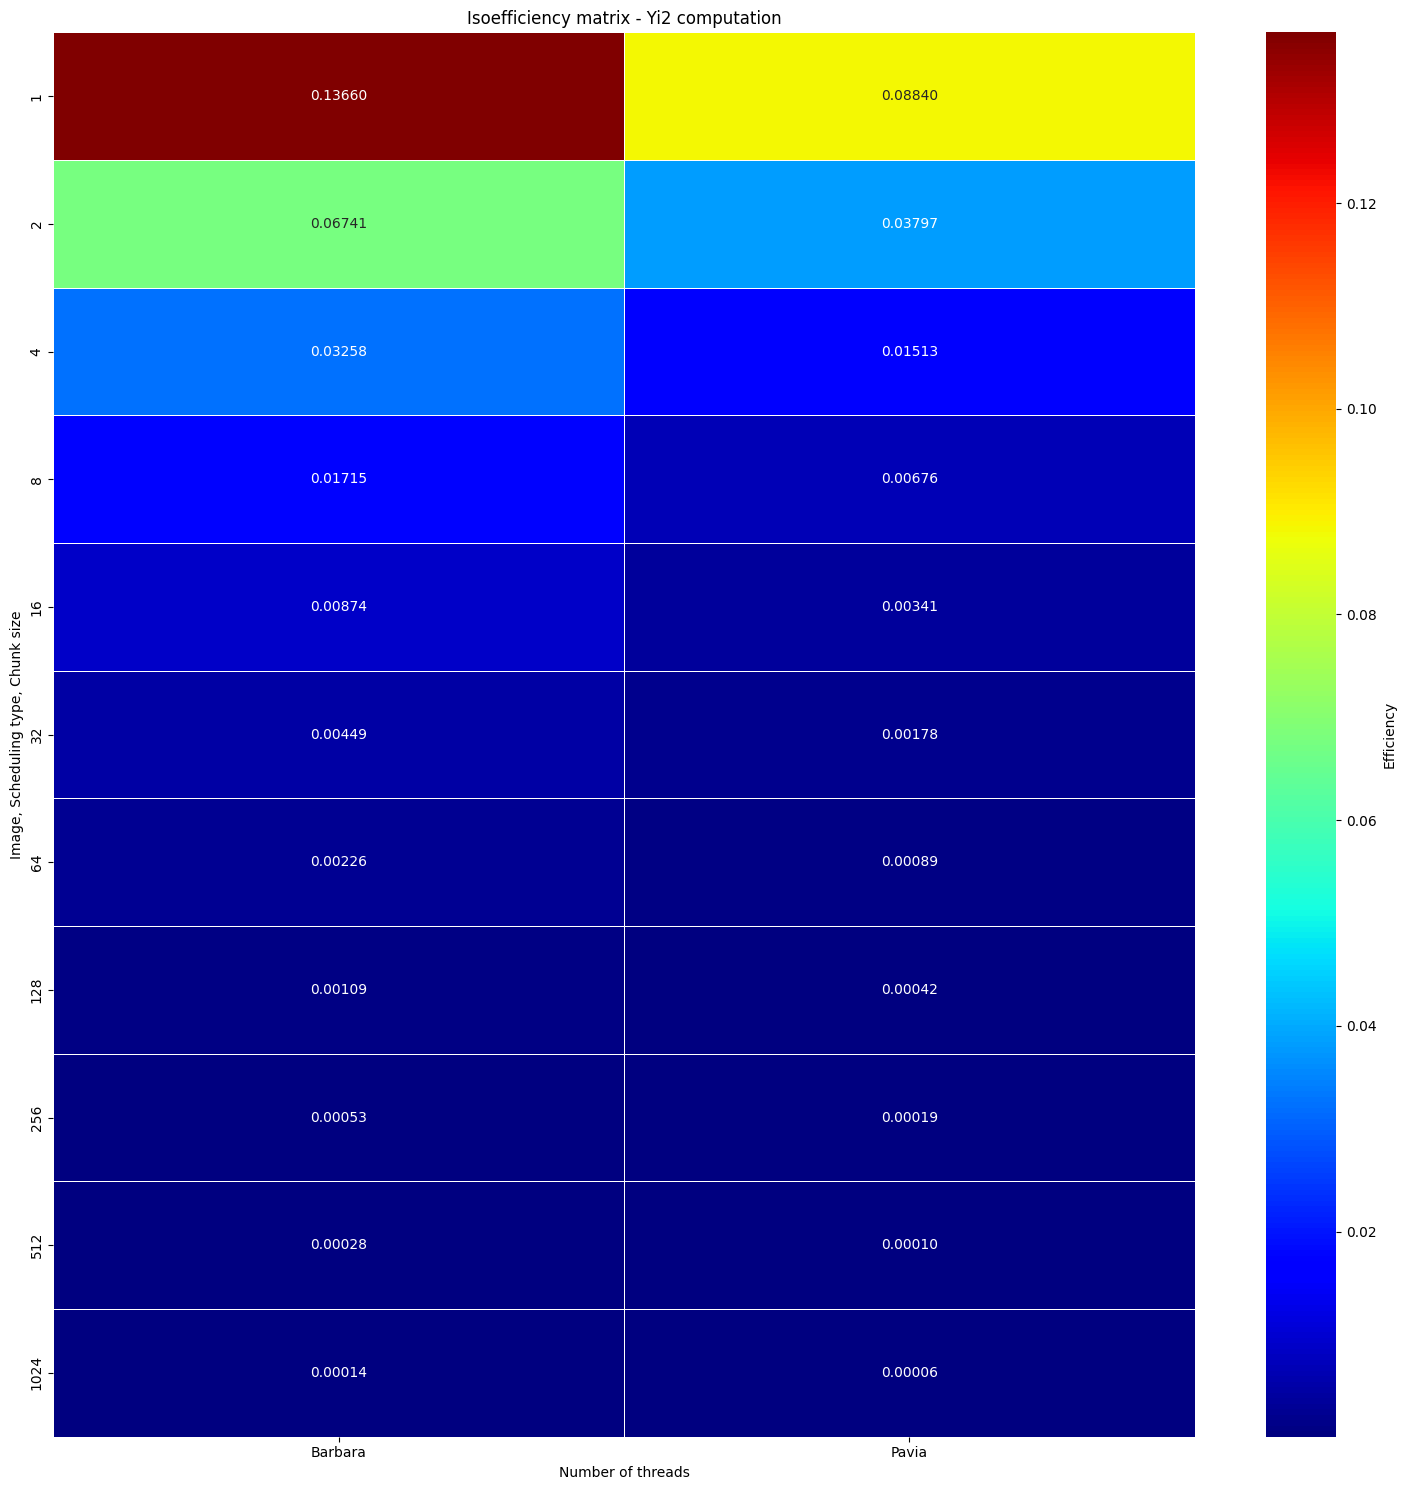

In [234]:
auto_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency yi2 (seq)',
	index=['Block size'],
	columns='Image'
)


plt.figure(figsize=(15, 15))

sns.heatmap(auto_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Yi2 computation')
plt.ylabel('Image, Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_yi2_cuda.png'))
plt.savefig(os.path.join(images_dir, 'isoefficiency_yi2_cuda.pdf'))

plt.show()

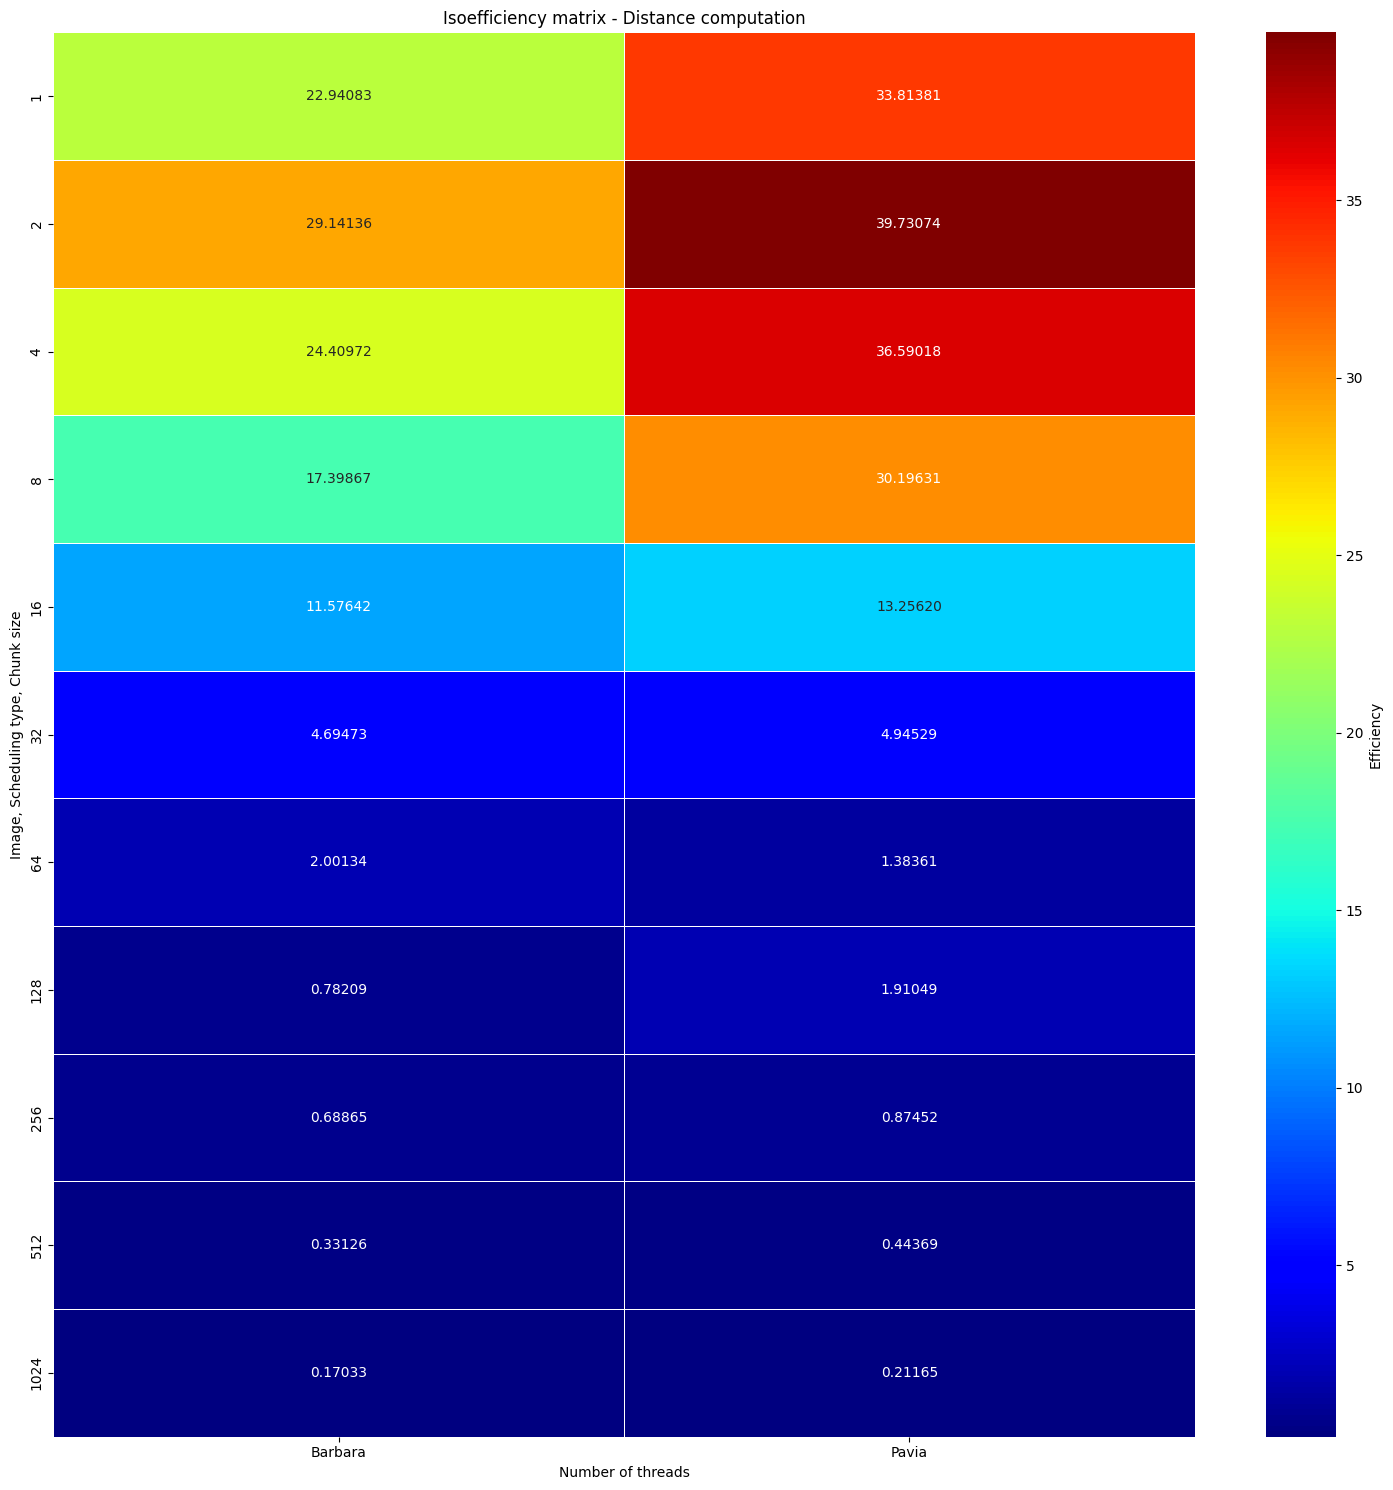

In [235]:
auto_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency distance (seq)',
	index=['Block size'],
	columns='Image'
)


plt.figure(figsize=(15, 15))

sns.heatmap(auto_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Distance computation')
plt.ylabel('Image, Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_distance_cuda.png'))
plt.savefig(os.path.join(images_dir, 'isoefficiency_distance_cuda.pdf'))

plt.show()

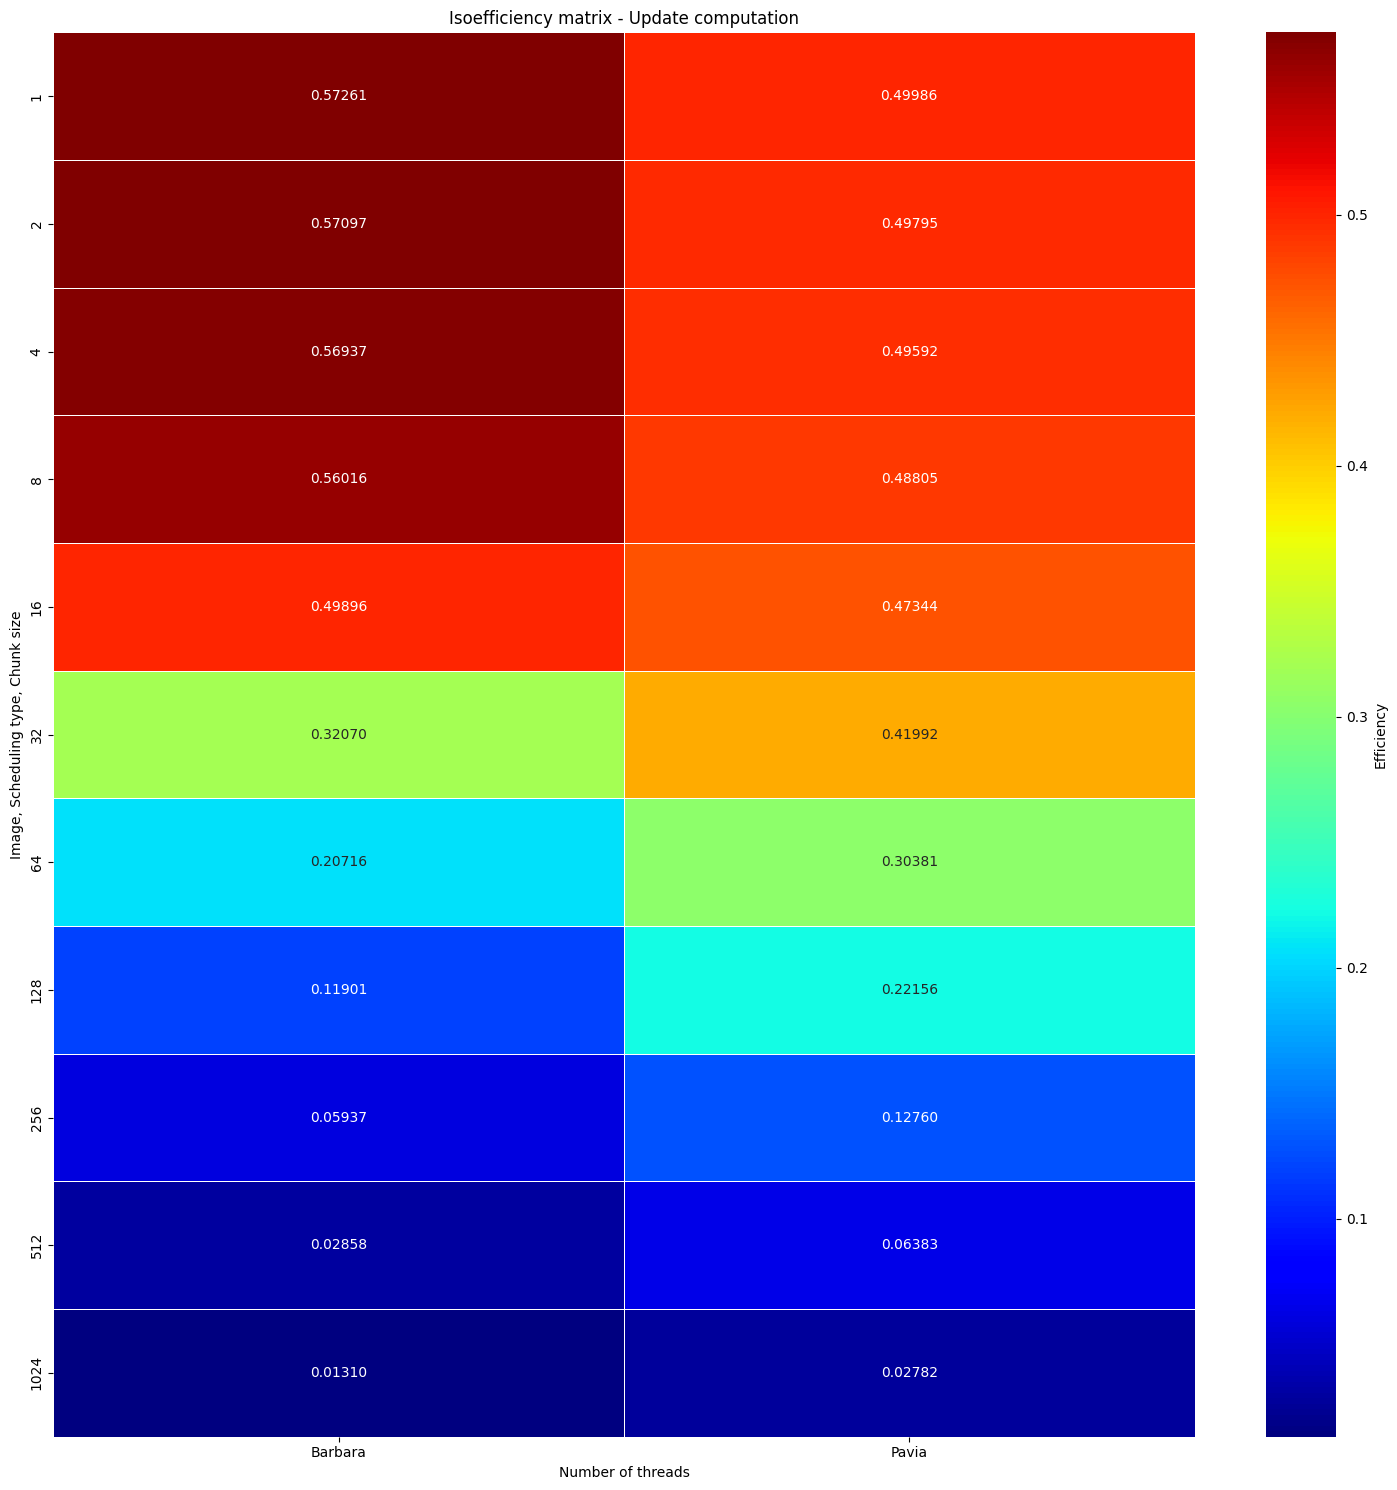

In [236]:
auto_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency update 1 (seq)',
	index=['Block size'],
	columns='Image'
)


plt.figure(figsize=(15, 15))

sns.heatmap(auto_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Update computation')
plt.ylabel('Image, Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_update_1_cuda.png'))
plt.savefig(os.path.join(images_dir, 'isoefficiency_update_1_cuda.pdf'))

plt.show()

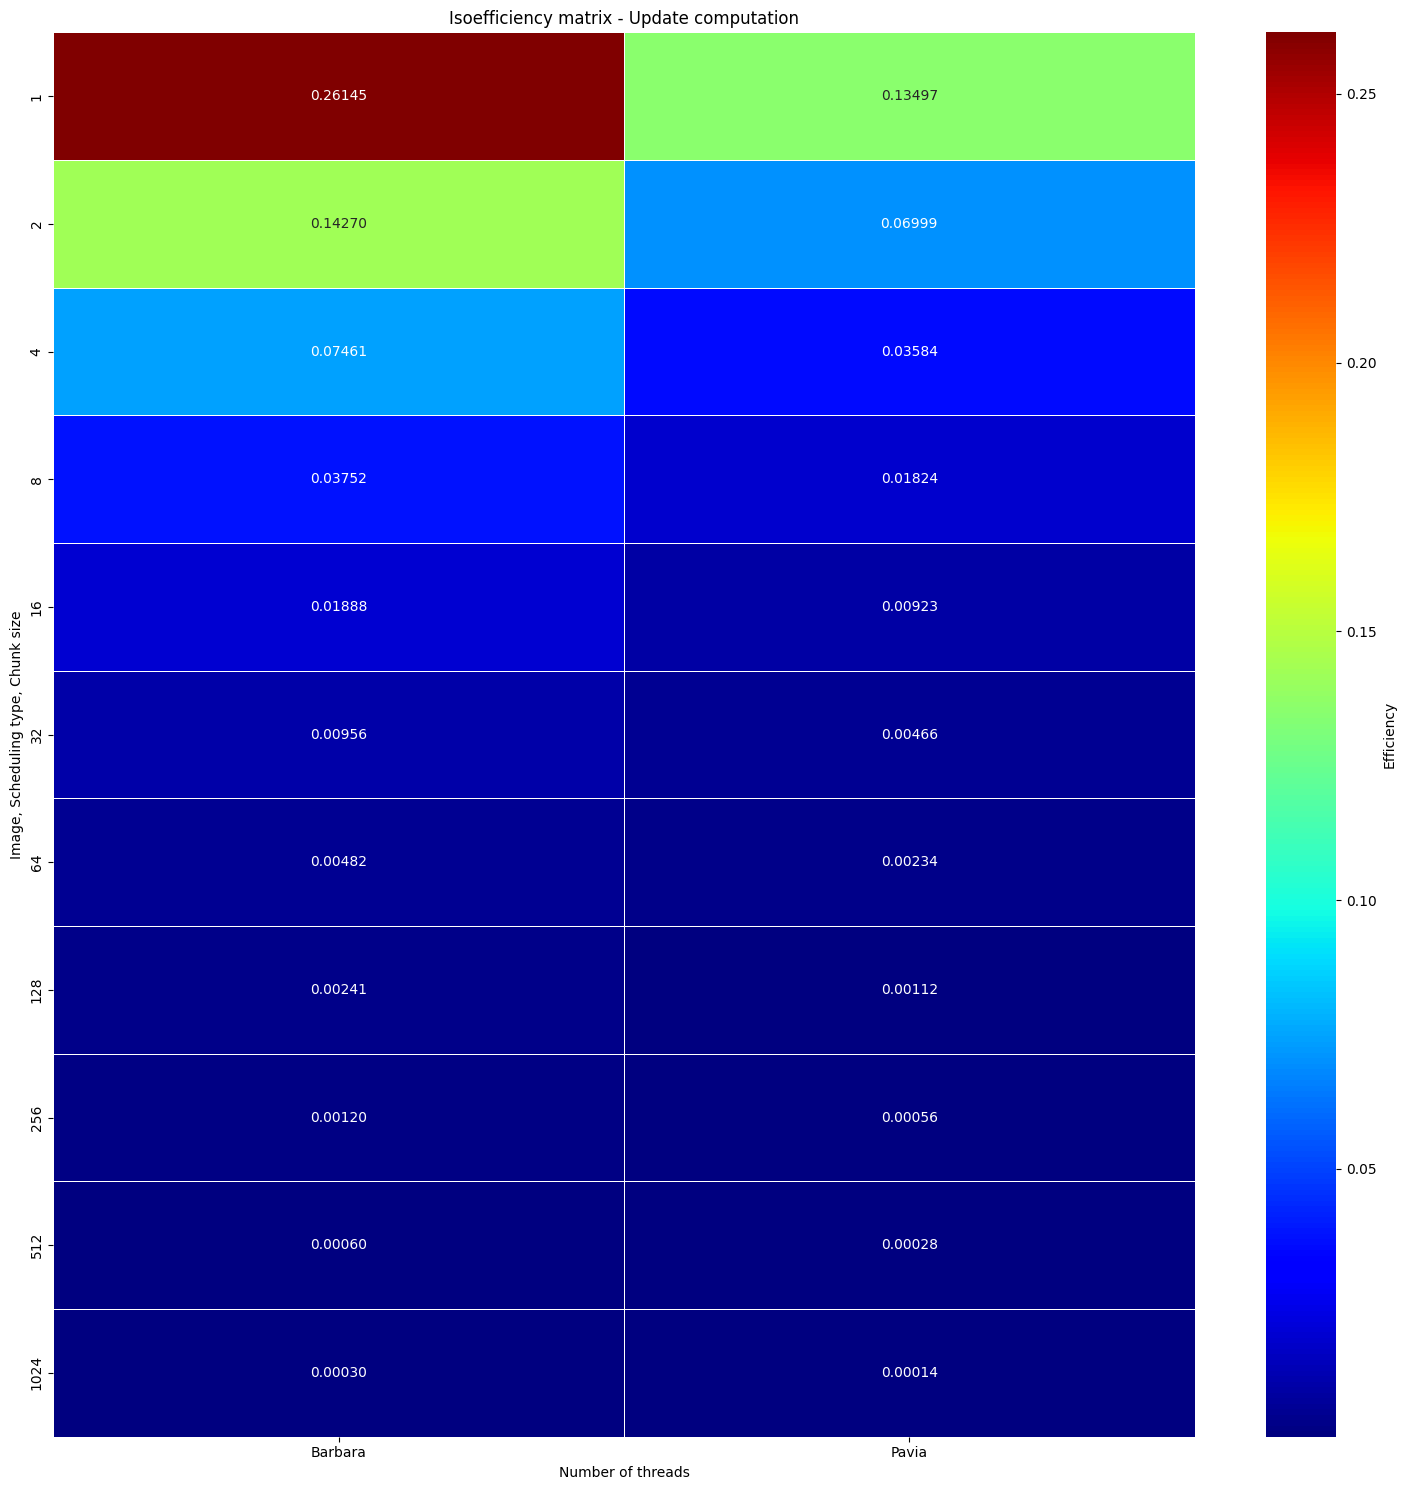

In [237]:
auto_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency update 2 (seq)',
	index=['Block size'],
	columns='Image'
)


plt.figure(figsize=(15, 15))

sns.heatmap(auto_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Update computation')
plt.ylabel('Image, Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_update_2_cuda.png'))
plt.savefig(os.path.join(images_dir, 'isoefficiency_update_2_cuda.pdf'))

plt.show()

/tmp/ipykernel_477286/221682835.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


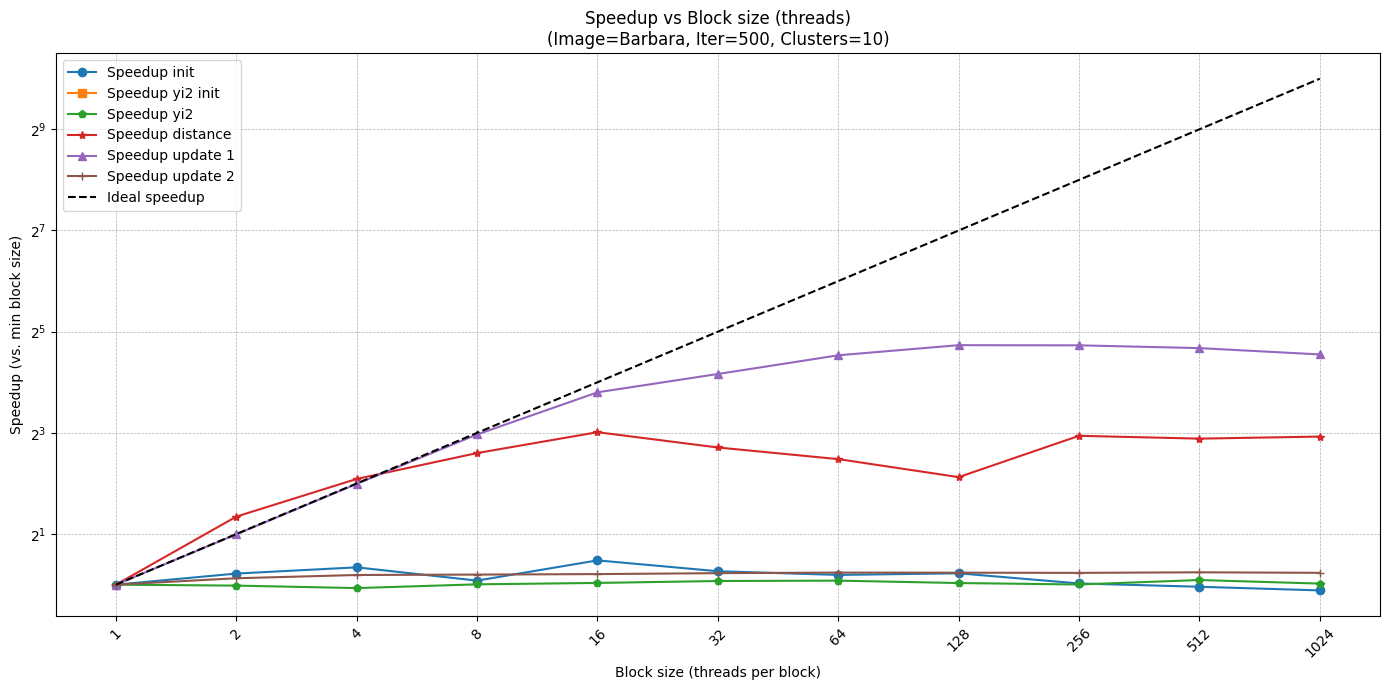

In [219]:
fixed_image = 'Barbara'
filtered_df = summary_df[(summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Block size')
max_threads = filtered_df['Block size'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Block size'], filtered_df['Speedup init (min block)'], marker='o', label='Speedup init')
plt.plot(filtered_df['Block size'], filtered_df['Speedup yi2 init (min block)'], marker='s', label='Speedup yi2 init')
plt.plot(filtered_df['Block size'], filtered_df['Speedup yi2 (min block)'], marker='p', label='Speedup yi2')
plt.plot(filtered_df['Block size'], filtered_df['Speedup distance (min block)'], marker='*', label='Speedup distance')
plt.plot(filtered_df['Block size'], filtered_df['Speedup update 1 (min block)'], marker='^', label='Speedup update 1')
plt.plot(filtered_df['Block size'], filtered_df['Speedup update 2 (min block)'], marker='+', label='Speedup update 2')

# Ideal speedup (en log scale también)
plt.plot(filtered_df['Block size'], filtered_df['Block size'] / filtered_df['Block size'].min(), 'k--', label='Ideal speedup')

plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xticks(filtered_df['Block size'].unique(), labels=filtered_df['Block size'].unique(), rotation=45)

plt.title(f'Speedup vs Block size (threads)\n(Image={fixed_image}, Iter=500, Clusters=10)')
plt.xlabel('Block size (threads per block)')
plt.ylabel('Speedup (vs. min block size)')

plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'speedup_vs_threads_cuda.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'speedup_vs_threads_cuda.{fixed_image.lower()}.pdf'))

plt.show()

/tmp/ipykernel_477286/1877409917.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


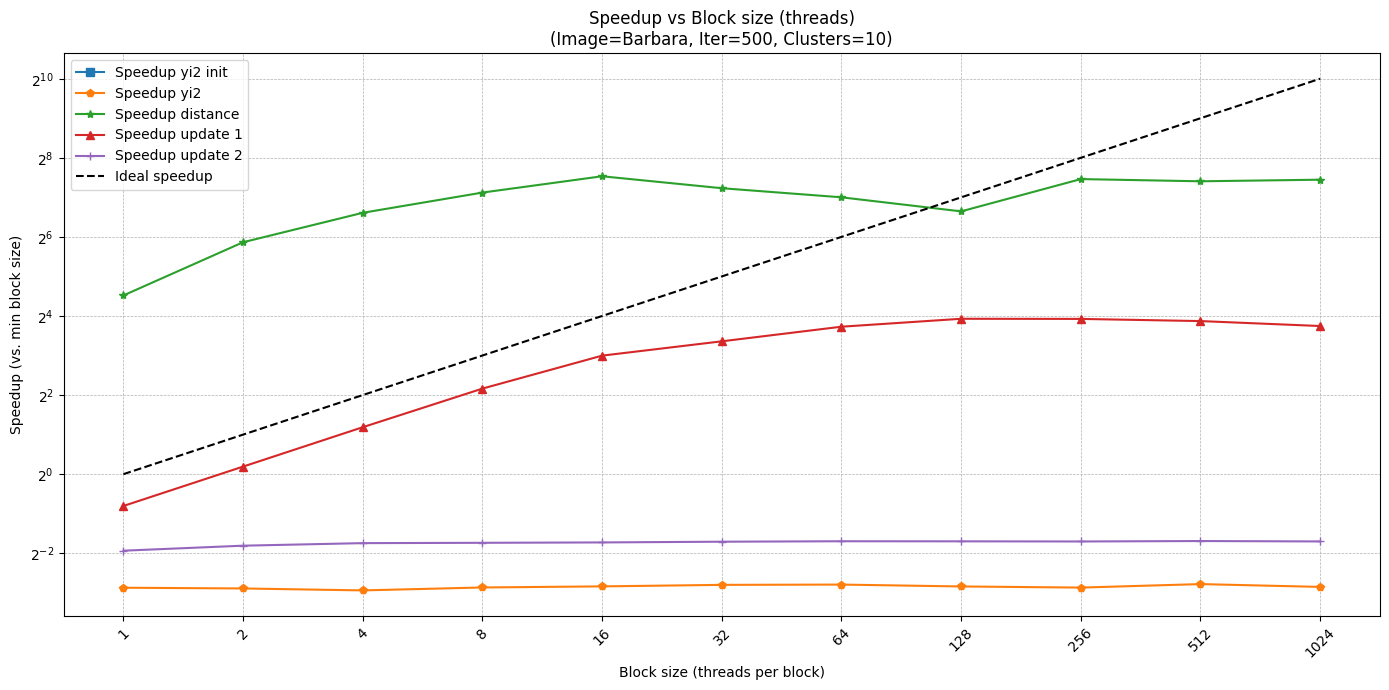

In [220]:
fixed_image = 'Barbara'
filtered_df = summary_df[(summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Block size')
max_threads = filtered_df['Block size'].max()

plt.figure(figsize=(14, 7))

#plt.plot(filtered_df['Block size'], filtered_df['Speedup init (seq)'], marker='o', label='Speedup init')
plt.plot(filtered_df['Block size'], filtered_df['Speedup yi2 init (seq)'], marker='s', label='Speedup yi2 init')
plt.plot(filtered_df['Block size'], filtered_df['Speedup yi2 (seq)'], marker='p', label='Speedup yi2')
plt.plot(filtered_df['Block size'], filtered_df['Speedup distance (seq)'], marker='*', label='Speedup distance')
plt.plot(filtered_df['Block size'], filtered_df['Speedup update 1 (seq)'], marker='^', label='Speedup update 1')
plt.plot(filtered_df['Block size'], filtered_df['Speedup update 2 (seq)'], marker='+', label='Speedup update 2')

# Ideal speedup (en log scale también)
plt.plot(filtered_df['Block size'], filtered_df['Block size'] / filtered_df['Block size'].min(), 'k--', label='Ideal speedup')

plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xticks(filtered_df['Block size'].unique(), labels=filtered_df['Block size'].unique(), rotation=45)

plt.title(f'Speedup vs Block size (threads)\n(Image={fixed_image}, Iter=500, Clusters=10)')
plt.xlabel('Block size (threads per block)')
plt.ylabel('Speedup (vs. min block size)')

plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'speedup_vs_threads_seq.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'speedup_vs_threads_seq.{fixed_image.lower()}.pdf'))

plt.show()

/tmp/ipykernel_477286/1469262223.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


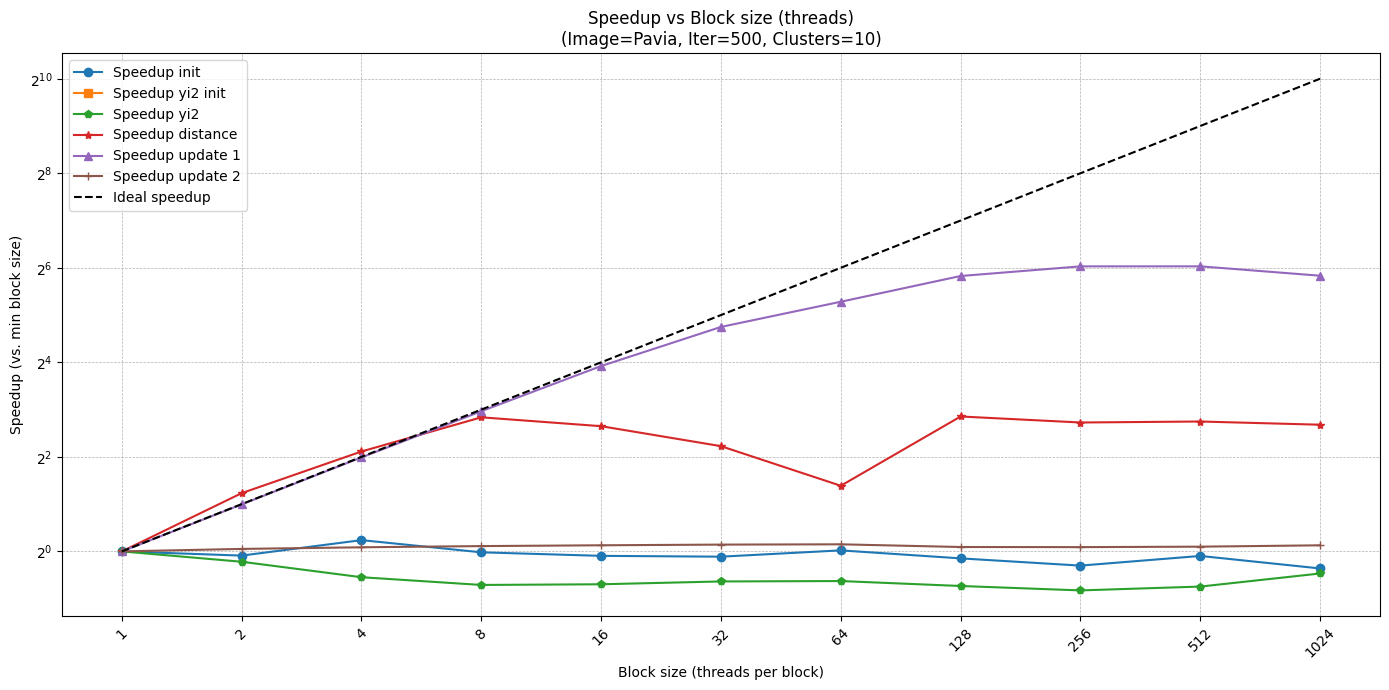

In [221]:
fixed_image = 'Pavia'
filtered_df = summary_df[(summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Block size')
max_threads = filtered_df['Block size'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Block size'], filtered_df['Speedup init (min block)'], marker='o', label='Speedup init')
plt.plot(filtered_df['Block size'], filtered_df['Speedup yi2 init (min block)'], marker='s', label='Speedup yi2 init')
plt.plot(filtered_df['Block size'], filtered_df['Speedup yi2 (min block)'], marker='p', label='Speedup yi2')
plt.plot(filtered_df['Block size'], filtered_df['Speedup distance (min block)'], marker='*', label='Speedup distance')
plt.plot(filtered_df['Block size'], filtered_df['Speedup update 1 (min block)'], marker='^', label='Speedup update 1')
plt.plot(filtered_df['Block size'], filtered_df['Speedup update 2 (min block)'], marker='+', label='Speedup update 2')

# Ideal speedup (en log scale también)
plt.plot(filtered_df['Block size'], filtered_df['Block size'] / filtered_df['Block size'].min(), 'k--', label='Ideal speedup')

plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xticks(filtered_df['Block size'].unique(), labels=filtered_df['Block size'].unique(), rotation=45)

plt.title(f'Speedup vs Block size (threads)\n(Image={fixed_image}, Iter=500, Clusters=10)')
plt.xlabel('Block size (threads per block)')
plt.ylabel('Speedup (vs. min block size)')

plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'speedup_vs_threads_cuda.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'speedup_vs_threads_cuda.{fixed_image.lower()}.pdf'))

plt.show()

/tmp/ipykernel_477286/886809215.py:28: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


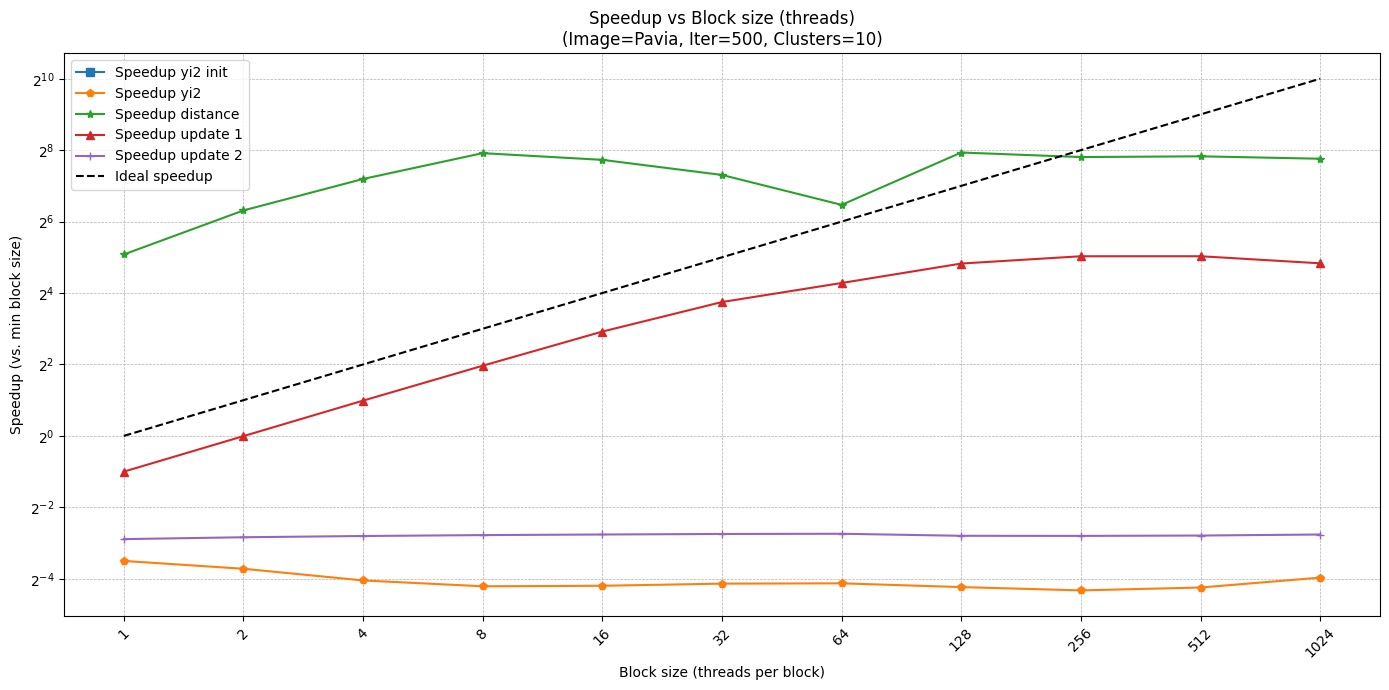

In [222]:
fixed_image = 'Pavia'
filtered_df = summary_df[(summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Block size')
max_threads = filtered_df['Block size'].max()

plt.figure(figsize=(14, 7))

#plt.plot(filtered_df['Block size'], filtered_df['Speedup init (seq)'], marker='o', label='Speedup init')
plt.plot(filtered_df['Block size'], filtered_df['Speedup yi2 init (seq)'], marker='s', label='Speedup yi2 init')
plt.plot(filtered_df['Block size'], filtered_df['Speedup yi2 (seq)'], marker='p', label='Speedup yi2')
plt.plot(filtered_df['Block size'], filtered_df['Speedup distance (seq)'], marker='*', label='Speedup distance')
plt.plot(filtered_df['Block size'], filtered_df['Speedup update 1 (seq)'], marker='^', label='Speedup update 1')
plt.plot(filtered_df['Block size'], filtered_df['Speedup update 2 (seq)'], marker='+', label='Speedup update 2')

# Ideal speedup (en log scale también)
plt.plot(filtered_df['Block size'], filtered_df['Block size'] / filtered_df['Block size'].min(), 'k--', label='Ideal speedup')

plt.xscale('log', base=2)
plt.yscale('log', base=2)
plt.xticks(filtered_df['Block size'].unique(), labels=filtered_df['Block size'].unique(), rotation=45)

plt.title(f'Speedup vs Block size (threads)\n(Image={fixed_image}, Iter=500, Clusters=10)')
plt.xlabel('Block size (threads per block)')
plt.ylabel('Speedup (vs. min block size)')

plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.ylim(bottom=0)
plt.legend()
plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'speedup_vs_threads_seq.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'speedup_vs_threads_seq.{fixed_image.lower()}.pdf'))

plt.show()

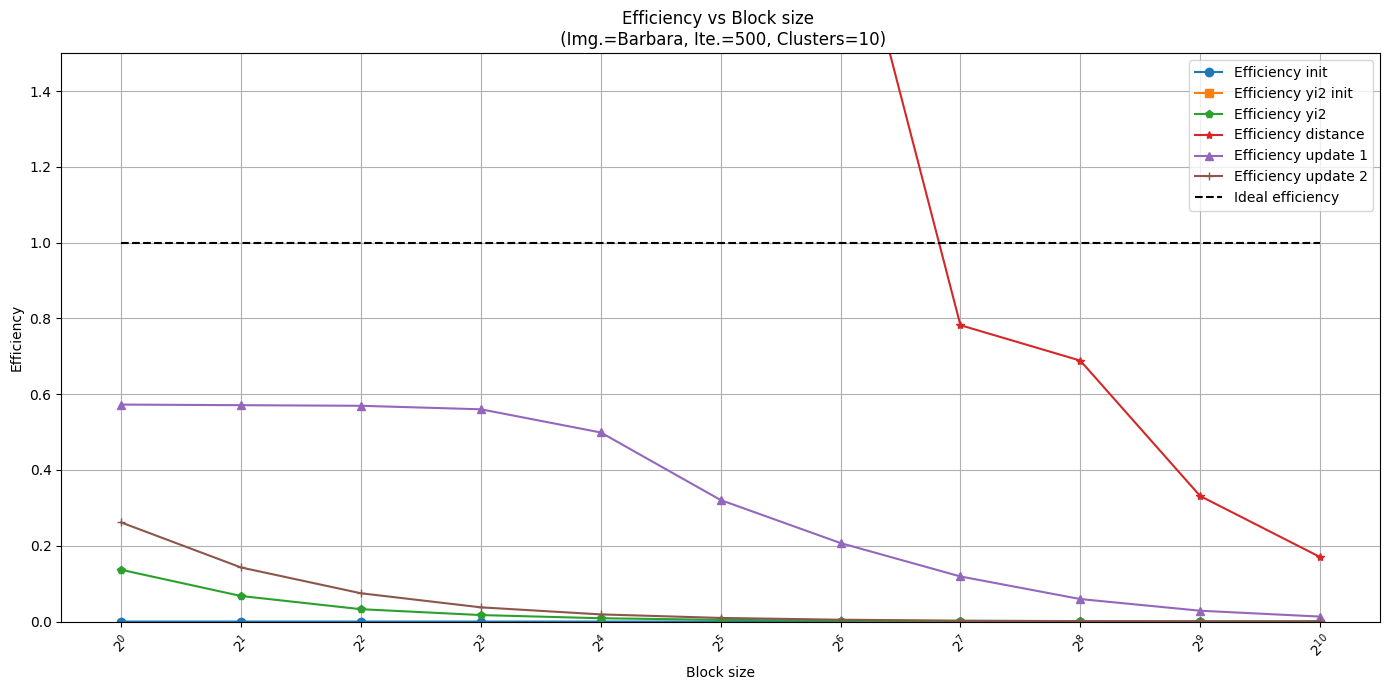

In [230]:
fixed_image = 'Barbara'

filtered_df = summary_df[ (summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Block size')
max_threads = filtered_df['Block size'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Block size'], filtered_df['Efficiency init (seq)'], marker='o', label='Efficiency init')
plt.plot(filtered_df['Block size'], filtered_df['Efficiency yi2 init (seq)'], marker='s', label='Efficiency yi2 init')
plt.plot(filtered_df['Block size'], filtered_df['Efficiency yi2 (seq)'], marker='p', label='Efficiency yi2')
plt.plot(filtered_df['Block size'], filtered_df['Efficiency distance (seq)'], marker='*', label='Efficiency distance')
plt.plot(filtered_df['Block size'], filtered_df['Efficiency update 1 (seq)'], marker='^', label='Efficiency update 1')
plt.plot(filtered_df['Block size'], filtered_df['Efficiency update 2 (seq)'], marker='+', label='Efficiency update 2')

plt.plot([1, max_threads], [1, 1], 'k--', label='Ideal efficiency')

plt.title(f'Efficiency vs Block size \n (Img.={fixed_image}, Ite.=500, Clusters=10)')
plt.xlabel('Block size')
plt.ylabel('Efficiency')

plt.xscale('log', base=2)
plt.xticks(
    [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
    rotation=45
)
plt.yticks()
plt.ylim(0, 1.5)

plt.grid()

plt.legend()

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'efficiency_vs_threads.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'efficiency_vs_threads.{fixed_image.lower()}.pdf'))

plt.show()

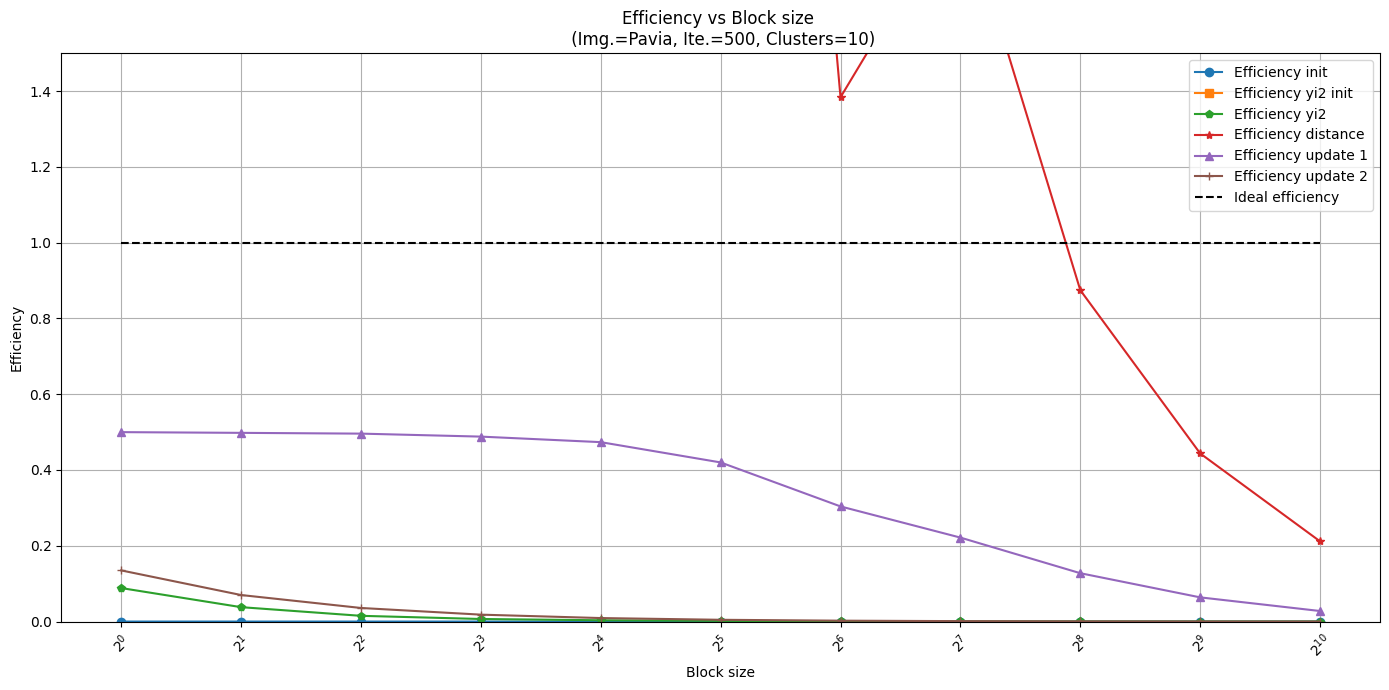

In [238]:
fixed_image = 'Pavia'

filtered_df = summary_df[ (summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Block size')
max_threads = filtered_df['Block size'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Block size'], filtered_df['Efficiency init (seq)'], marker='o', label='Efficiency init')
plt.plot(filtered_df['Block size'], filtered_df['Efficiency yi2 init (seq)'], marker='s', label='Efficiency yi2 init')
plt.plot(filtered_df['Block size'], filtered_df['Efficiency yi2 (seq)'], marker='p', label='Efficiency yi2')
plt.plot(filtered_df['Block size'], filtered_df['Efficiency distance (seq)'], marker='*', label='Efficiency distance')
plt.plot(filtered_df['Block size'], filtered_df['Efficiency update 1 (seq)'], marker='^', label='Efficiency update 1')
plt.plot(filtered_df['Block size'], filtered_df['Efficiency update 2 (seq)'], marker='+', label='Efficiency update 2')

plt.plot([1, max_threads], [1, 1], 'k--', label='Ideal efficiency')

plt.title(f'Efficiency vs Block size \n (Img.={fixed_image}, Ite.=500, Clusters=10)')
plt.xlabel('Block size')
plt.ylabel('Efficiency')

plt.xscale('log', base=2)
plt.xticks(
    [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
    rotation=45
)
plt.yticks()
plt.ylim(0, 1.5)

plt.grid()

plt.legend()

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'efficiency_vs_threads.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'efficiency_vs_threads.{fixed_image.lower()}.pdf'))

plt.show()

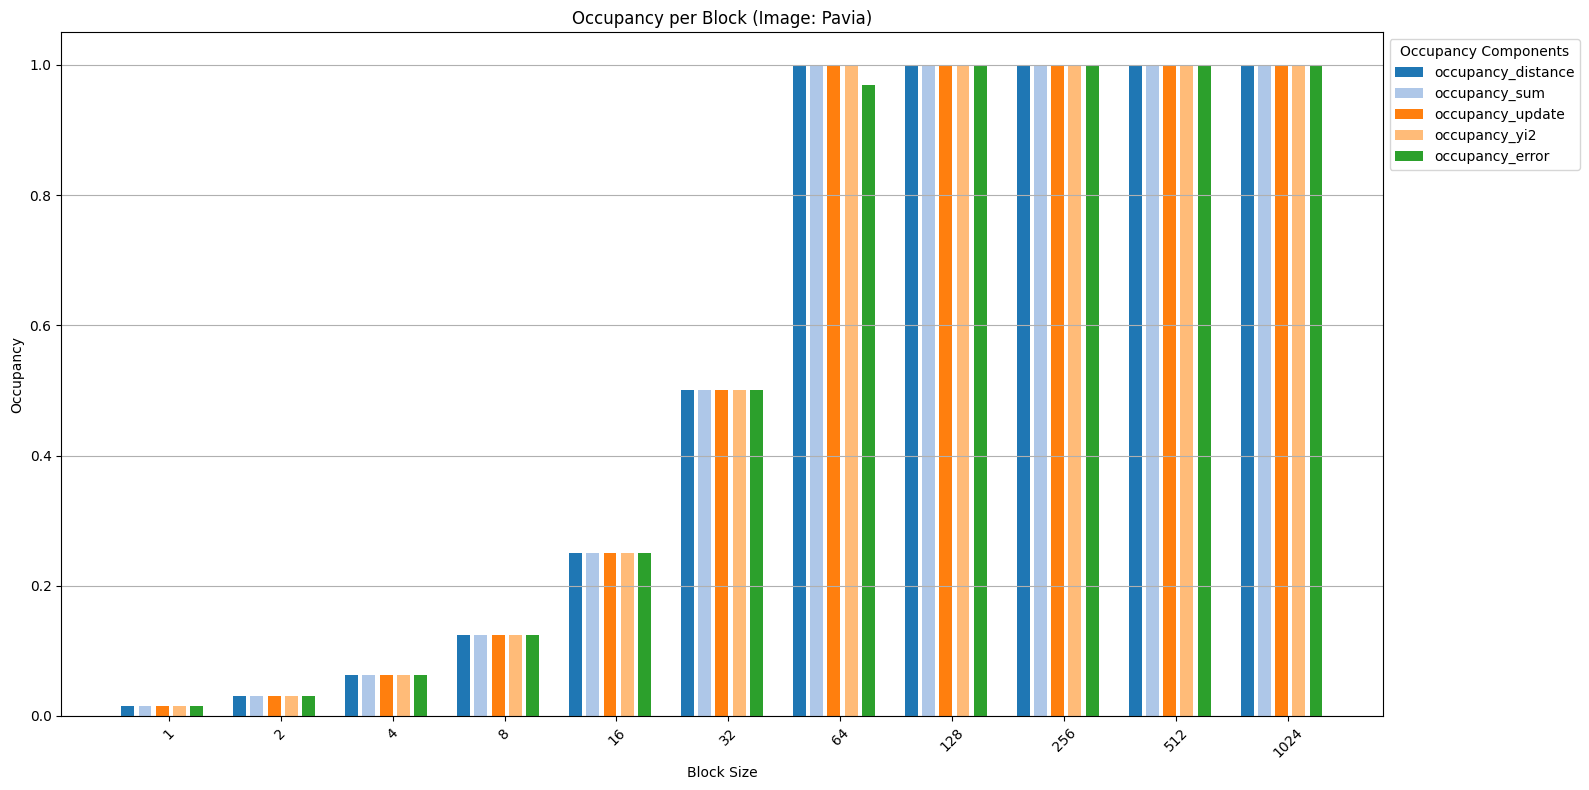

In [225]:
fixed_image = 'Pavia'
data_filtered = data[data['image'] == fixed_image]

unique_block_sizes = np.sort(data_filtered['block_size'].unique())
metrics = [
    'occupancy_distance',
    'occupancy_sum',
    'occupancy_update',
    'occupancy_yi2',
    'occupancy_error'
]

n_groups = len(unique_block_sizes)
n_metrics = len(metrics)

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * n_metrics
x = np.arange(n_groups) * (group_width + 0.3)  # espacio extra entre grupos

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(16, 8))

for i, metric in enumerate(metrics):
    metric_means = []
    for block_size in unique_block_sizes:
        mean_val = data_filtered[data_filtered['block_size'] == block_size][metric].mean()
        metric_means.append(mean_val)

    bar_positions = x + i * (bar_width + bar_spacing)
    ax.bar(bar_positions, metric_means, width=bar_width, color=colors[i], label=metric)

ax.set_xticks(x + group_width / 2 - bar_spacing / 2)
ax.set_xticklabels(unique_block_sizes, rotation=45)
ax.set_xlabel('Block Size')
ax.set_ylabel('Occupancy')
ax.set_title(f'Occupancy per Block (Image: {fixed_image})')

ax.legend(title='Occupancy Components', loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'occupancy_per_block_parallel_{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'occupancy_per_block_parallel_{fixed_image.lower()}.pdf'))
plt.show()


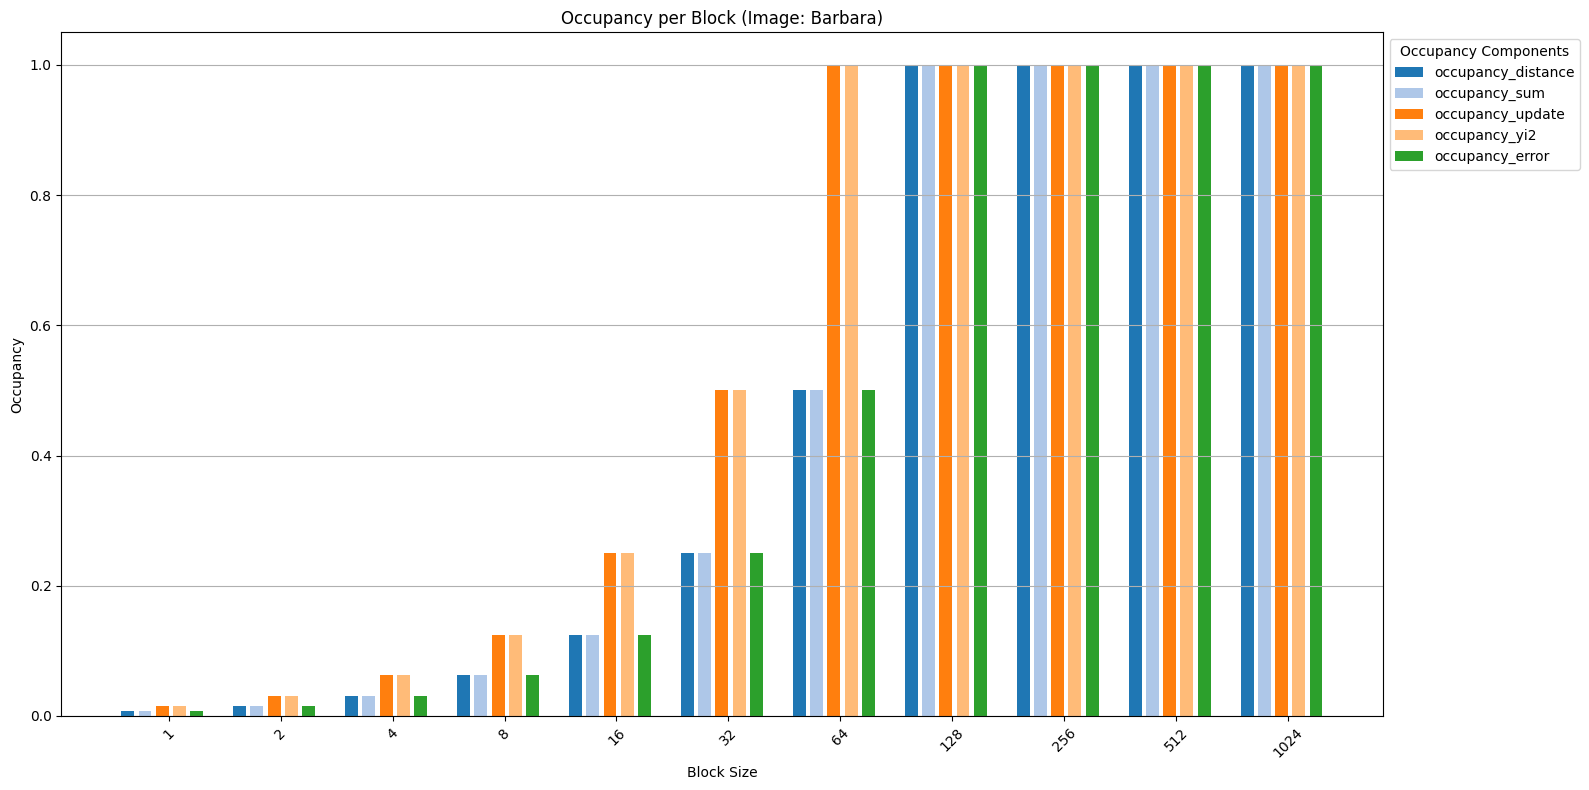

In [226]:
fixed_image = 'Barbara'
data_filtered = data[data['image'] == fixed_image]

unique_block_sizes = np.sort(data_filtered['block_size'].unique())
metrics = [
    'occupancy_distance',
    'occupancy_sum',
    'occupancy_update',
    'occupancy_yi2',
    'occupancy_error'
]

n_groups = len(unique_block_sizes)
n_metrics = len(metrics)

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * n_metrics
x = np.arange(n_groups) * (group_width + 0.3)  # espacio extra entre grupos

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(16, 8))

for i, metric in enumerate(metrics):
    metric_means = []
    for block_size in unique_block_sizes:
        mean_val = data_filtered[data_filtered['block_size'] == block_size][metric].mean()
        metric_means.append(mean_val)

    bar_positions = x + i * (bar_width + bar_spacing)
    ax.bar(bar_positions, metric_means, width=bar_width, color=colors[i], label=metric)

ax.set_xticks(x + group_width / 2 - bar_spacing / 2)
ax.set_xticklabels(unique_block_sizes, rotation=45)
ax.set_xlabel('Block Size')
ax.set_ylabel('Occupancy')
ax.set_title(f'Occupancy per Block (Image: {fixed_image})')

ax.legend(title='Occupancy Components', loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'occupancy_per_block_parallel_{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'occupancy_per_block_parallel_{fixed_image.lower()}.pdf'))
plt.show()